# 9. Newton's Method

Newton's Method uses a low level Taylor approximation of the function $f$ in order to solve

$$
  f(x) = 0
$$

More precisely, we begin with a point $x$ and ask how we might find a nearby point $x+h$ for which $f(x+h)=0$? Our answer uses the first order Taylor approximation

$$
  \boxed{f(x+h) \approx f(x) + hf'(x)} \tag{T1}
$$

Do you see that the $h$ that makes $f(x+h)=0$ is simply

$$
  \boxed{h = \frac{-f(x)}{f'(x)} } \tag{T2}
$$

Now, this only really works when that $\approx$ in (T1) holds, and that only holds when $f$ is linear, i.e., $f(x)=mx+b$. Its broader application comes from the stubborn idea that perhaps if we repeat our application of (T1) at the new point, $x+h$, we might improve on our original choice. And perhaps continuing to beat on this one Taylor idea may get us home in the end.

This is amazingly easy to code, we just keep setting

$$
  \boxed{x = x - \frac{f(x)}{f'(x)}  \hskip 0.25in\hbox{until}\hskip 0.25in f(x) = 0} \tag{Newton}
$$

In practice, this "until" is coded via a **while** loop and we typically never really truly get to 0, but instead can tolerate a little error, called $tol$, and so only iterate until $|f(x)|<tol$.

And there is one more practicality, for those cases in which Newton gets stuck, we will terminate his search if he does not succeed in his first 10 steps or so.

The code below takes these practicalities into account and also illustrates the step-by-step progression.

<IPython.core.display.Javascript object>


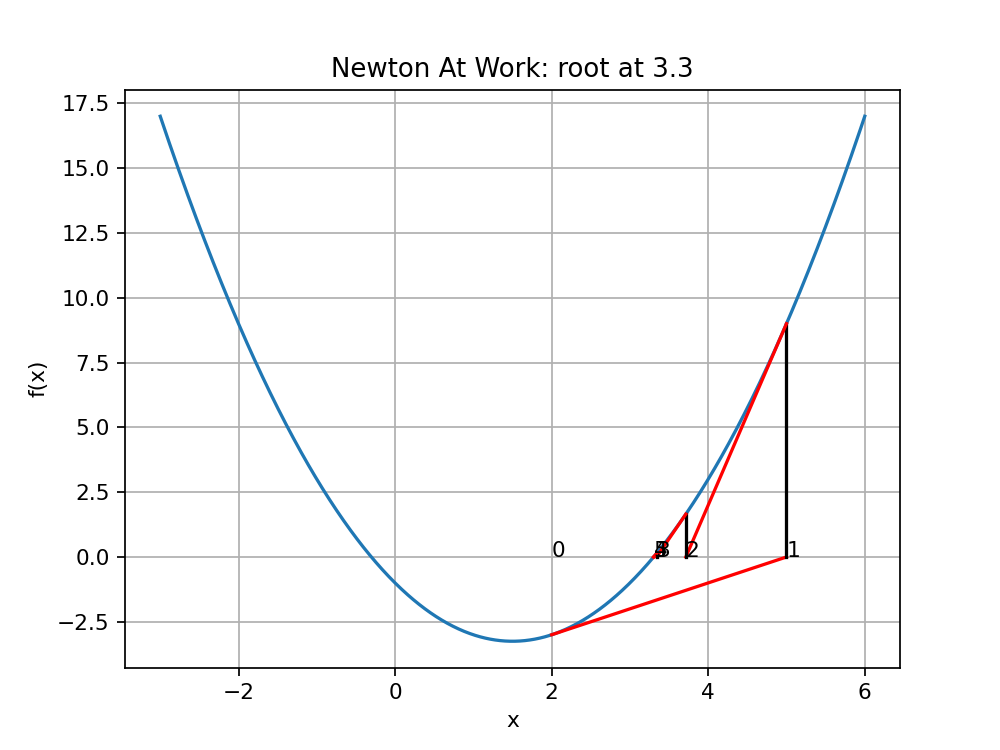

In [5]:
# Newton in action, find a solution to f(x) = 0 and show work along the way

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

def f(x):                         
    return x**2 - 3*x - 1     # your function here

def df(x):
    return 2*x - 3            # and its derivative

x = np.linspace(-3,6,1000)   # make 1000 x points between -3 and 3
plt.plot(x, f(x))           # plot f(x) vs. x

z = 2        # starting guess
tol = 0.001     # how small do you want |f(x)| to get
iter = 0       # count the number of Newton steps on way to answer

plt.text(z,0,str(iter))  # mark the place
x0, y0 = z, f(z)

while ( abs(f(z)) > tol and iter < 10 ):   # The Main Loop
    z = z - f(z)/df(z)
    iter = iter + 1
    
    x1, y1 = z, f(z)           # new point
    plt.plot([x0,x1],[y0,0],'r')    # tangent      
    plt.plot([x1,x1],[0,y1],'k')    # vertical
    x0, y0 = x1, y1            # old = new
    plt.text(z,0,str(iter))    # mark the place so we can watch Newton work

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Newton At Work: root at ' + str(round(z,2)))
plt.grid('on');    

Please zoom in to try to understand how Newton moves through the world.

Explore changes in the tolerance, starting point, and maximum number of iterations. Then explore new choices of function (and its derivative).

We now explore how our root moves with changes in a coefficient in our equation. In particular, we explore a root of

$$
  x^2 - bx - 1
$$

as $b$ varies from 2 to 16.

In [2]:
# follow the root of a quadratic as we vary a coefficient

c = 1 # a fixed coefficient

def f(x,b):                         
    return x**2 - b*x - c     # your function here

def df(x,b):
    return 2*x - b           # and its derivative

B = np.linspace(2,16,20)
z = 2         # starting guess
tol = 0.001     # how small do you want |f(x,b)| to get

for b in B:   # step through the b values
    
    iter = 0       # count the number of Newton steps on way to answer
    while ( abs(f(z,b)) > tol and iter < 10 ):   # The Main Loop
        z = z - f(z,b)/df(z,b)
        iter = iter + 1
        
    plt.plot(b, z, 'r.')

plt.xlabel('b')
plt.ylabel('x(b)')
plt.title('Newton At Work: root of $x^2-bx-c$')
plt.grid('on')

**Exercise 1.** Adapt the code cell above to find, follow, and graph a root of

$$
  x^2 - b\exp(x/c) - 1
$$

as $b$ travels from 2 to 16 and $c=-2$.

Our next goal is to use Newton's Method to produce the IV (current/voltage) curve for a Solar Panel.

The Standard Circuit Model for a Solar Panel is

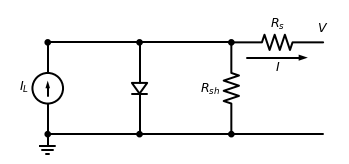

In [3]:
# Draw the solar panel equivalent circuit
%matplotlib inline
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    
    d += (line :=  elm.Line().right().dot())
    d.push()
    
    d += elm.DIODE().down().dot()
    d.pop()
    
    d += elm.Line().right().dot()
    d.push()
    
    d += (Rs := elm.Resistor().right().label('$R_s$').label('$V$',ofst=(1.5,0)))
    d += elm.CurrentLabel(top=False, ofst=.5).at(Rs).label('$I$').right()
    d.pop()
    
    d += elm.Resistor().label('$R_{sh}$').down().dot()  # Rsh = d.add(elm.RES, label='$R_{sh}$', d='down')
    d.push()
    
    d += elm.Line().right()    # d.add(elm.LINE, d='right')
    d.pop()
    
    d += elm.Line().left().tox(line.start).dot()   # d.add(elm.LINE, d='left', tox = line.start)
    d += elm.Ground()  # d.add(elm.GND)   
    d += elm.SourceI().label('$I_L$').dot()   #d.add(elm.SOURCE_I, d='up', label='$I_L$')

In this model, $I_L$ is the light current and the diode models the panel's p-n junction. Balancing currents, using Ohm's Law for the resistors and Shockley's exponential law for the diode, we arrive at the **Solar Panel Equation**

$$
  \boxed{ I_L - I_0(\exp((V+IR_s)/a) - 1) - (V+IR_s)/R_{sh} - I = 0 }  \tag{SPE}
$$

**Exercise 2.** Use Newton's Method to solve (SPE) for I as V runs from 0 to 43 volts, using the parameter values

```python
Rs = 0.969 # Ohms
Rsh = 199 # Ohms 
IL = 4.8 # Amps  
I0 = 2.5e-4 # Amps 
a = 4.4 # Volts
```

and arrive at the IV curve below. You will need to code

```python
def f(I,V):
    return IL - I0*(np.exp((V+I*Rs)/a) - 1) - (V+I*Rs)/Rsh - I
```

and its derivative with respect to `I`

```python
def df(I,V):
    return ???
```

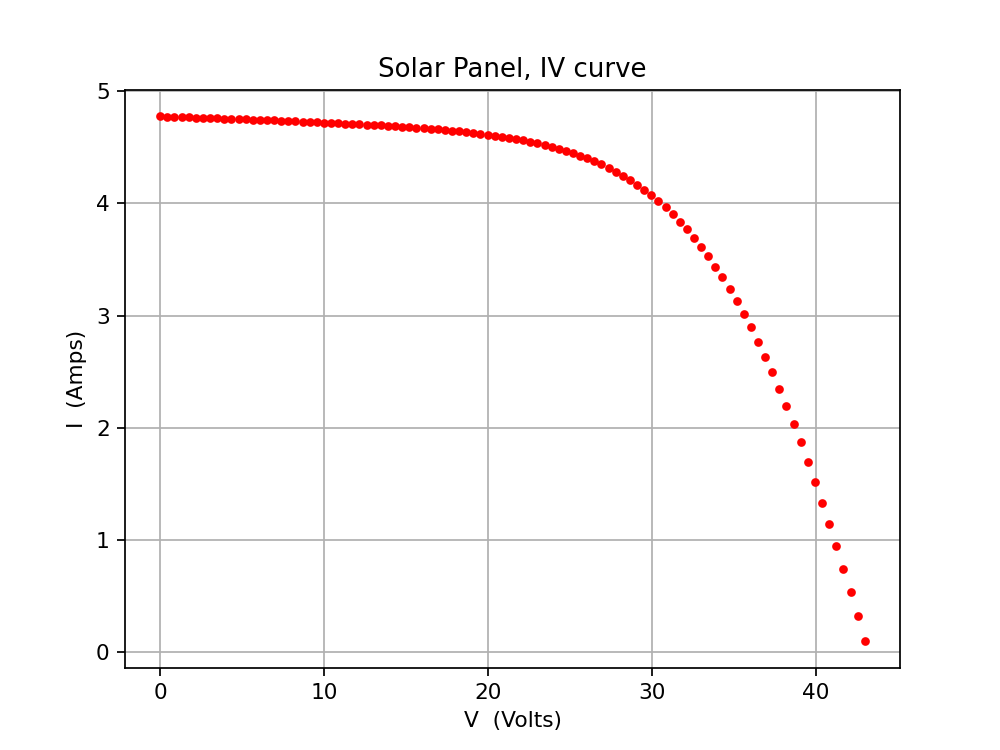

In [4]:
from IPython import display 
from base64 import b64decode

base64_data = "iVBORw0KGgoAAAANSUhEUgAAA+gAAALuCAYAAAA9jTxNAAAgAElEQVR4XuydCbgdVZW2VwISkCiIzJILODJcZXSkERRBkhYhCSoKMmgMtgpOPyrSDKIILW0rODUhiKItoGSQloRGQEFAEGUwXhBRIveCKCAiooCA+Z9V4cSTm3vuqbPO2uesXfXW8/TT3ab2qrXe9e19/U5V7ZqwbNmyZcIBAQhAAAIQgAAEIAABCEAAAhCAQF8JTMCg95U/F4cABCAAAQhAAAIQgAAEIAABCBQEMOgIAQIQgAAEIAABCEAAAhCAAAQgEIAABj1AE0gBAhCAAAQgAAEIQAACEIAABCCAQUcDEIAABCAAAQhAAAIQgAAEIACBAAQw6AGaQAoQgAAEIAABCEAAAhCAAAQgAAEMOhqAAAQgAAEIQAACEIAABCAAAQgEIIBBD9AEUoAABCAAAQhAAAIQgAAEIAABCGDQ0QAEIAABCEAAAhCAAAQgAAEIQCAAAQx6gCaQAgQgAAEIQAACEIAABCAAAQhAAIOOBiAAAQhAAAIQgAAEIAABCEAAAgEIYNADNIEUIAABCEAAAhCAAAQgAAEIQAACGHQ0AAEIQAACEIAABCAAAQhAAAIQCEAAgx6gCaQAAQhAAAIQgAAEIAABCEAAAhDAoKMBCEAAAhCAAAQgAAEIQAACEIBAAAIY9ABNIAUIQAACEIAABCAAAQhAAAIQgAAGHQ1AAAIQgAAEIAABCEAAAhCAAAQCEMCgB2gCKUAAAhCAAAQgAAEIQAACEIAABDDoaAACEIAABCAAAQhAAAIQgAAEIBCAAAY9QBNIAQIQgAAEIAABCEAAAhCAAAQggEFHAxCAAAQgAAEIQAACEIAABCAAgQAEMOgBmkAKEIAABCAAAQhAAAIQgAAEIAABDDoagAAEIAABCEAAAhCAAAQgAAEIBCCAQQ/QBFKAAAQgAAEIQAACEIAABCAAAQhg0NEABCAAAQhAAAIQgAAEIAABCEAgAAEMeoAmkAIEIAABCEAAAhCAAAQgAAEIQACDjgYgAAEIQAACEIAABCAAAQhAAAIBCGDQAzSBFCAAAQhAAAIQgAAEIAABCEAAAhh0NAABCEAAAhCAAAQgAAEIQAACEAhAAIMeoAmkAAEIQAACEIAABCAAAQhAAAIQwKCjAQhAAAIQgAAEIAABCEAAAhCAQAACGPQATSAFCEAAAhCAAAQgAAEIQAACEIAABh0NQAACEIAABCAAAQhAAAIQgAAEAhDAoAdoAilAAAIQgAAEIAABCEAAAhCAAAQw6GgAAhCAAAQgAAEIQAACEIAABCAQgAAGPUATSAECEIAABCAAAQhAAAIQgAAEIIBBRwMQgAAEIAABCEAAAhCAAAQgAIEABDDoAZpAChCAAAQgAAEIQAACEIAABCAAAQw6GoAABCAAAQhAAAIQgAAEIAABCAQggEEP0ARSgAAEIAABCEAAAhCAAAQgAAEIYNDRAAQgAAEIQAACEIAABCAAAQhAIAABDHqAJpACBCAAAQhAAAIQgAAEIAABCEAAg44GIAABCEAAAhCAAAQgAAEIQAACAQhg0AM0gRQgAAEIQAACEIAABCAAAQhAAAIYdDQAAQhAAAIQgAAEIAABCEAAAhAIQACDHqAJpAABCEAAAhCAAAQgAAEIQAACEMCgowEIQAACEIAABCAAAQhAAAIQgEAAAhj0AE0gBQhAAAIQgAAEIAABCEAAAhCAAAYdDUAAAhCAAAQgAAEIQAACEIAABAIQwKAHaAIpQAACEIAABCAAAQhAAAIQgAAEMOhoAAIQgAAEIAABCEAAAhCAAAQgEIAABj1AE0gBAhCAAAQgAAEIQAACEIAABCCAQUcDEIAABCAAAQhAAAIQgAAEIACBAAQw6AGaQAoQgAAEIAABCEAAAhCAAAQgAAEMOhqAAAQgAAEIQAACEIAABCAAAQgEIIBBD9AEUoAABCAAAQhAAAIQgAAEIAABCGDQ0QAEIAABCEAAAhCAAAQgAAEIQCAAAQx6gCaQAgQgAIFeEvjVr34l//3f/y0/+MEPZOnSpfK3v/1N1l9/fdloo43khS98oey2227F/2y77bbuaU2YMKGIefbZZ8uhhx7qHt8roOb29a9/fZVwT3va0+TZz362bLfddvLmN79ZDjroIFljjTW8LhsizgknnCCf+MQnZPPNN5ff/va37jntvvvucsUVV6wU/8orryw0p8d//dd/yQc/+MFS1122bJlsueWWcuedd8rLXvYyue6660qN4yQIQAACEIBAVAIY9KidIS8IQAACCQh87nOfk49+9KPy+OOPt42u5sf7yN2gj+ax0047yeLFi2WDDTbwRtW3eP0w6Kq15z73ucUPAsr0pz/9aan6f/SjH8mrX/3q4twvfOEL8r73va/UOE6CAAQgAAEIRCWAQY/aGfKCAAQg4Ezgm9/8prz97W8vourdUb1LqXctN9tsM/n73/8uemdd72R+5zvfkV/84heCQV9+B/0vf/nLik4op5///OfFHeYf/vCHxX++5557yiWXXOLcrf6F64dB12r//d//XU466aSi8FtvvVW22mqrthAOP/xwmTNnjqy++uryu9/9rlI/lLQtnhMgAAEIQKCSBDDolWwrRUEAAhBYlYCa8uHh4eKR4J/97GfyrGc9qyUmNZ/6KLL3keMd9LF+qNAnEF7ykpfIL3/5ywKRPlqtj1hX4eiXQb/ttttWmHI165/85CfHxak/lmyyySbywAMPyBve8Ab53//93yrgpwYIQAACEKg5AQx6zQVA+RCAQD0I6N3xF73oRUWxepfy4x//eF8Kr4pBV3j6jnrjPfpPf/rTcvTRR/eFqfdF+2XQtY6XvvSlxePt+iPSHXfcMW5pCxculOnTpxfnnH/++cWeABwQgAAEIACB3Alg0HPvIPlDAAIQKEHgmmuukV122aU40+Nd3fnz5xcbvV1//fXypz/9SdZZZx3ZYYcdik3T9H8aRnx0auMZ9CeeeEL0neLvfve7xaP2v/nNb4oN7PRO//bbby9ve9vbikf0V1tttTErbmw+dsghh8jXvva1Is5XvvIVuemmm+S+++6TI444Qj7/+c+XoCWF8W5sEtfqUX81kmoo9XjPe94jX/rSl4r/++677y7u5n7ve9+Tm2++We69917RzeWmTJkir33ta4tXC57//OePmYc+ufCa17ym+DfdwE837/vMZz5TvHag72evueaaxTWPOuqo4tH68Y6//vWvxWaAamT1kXF9VF/jqQ6Uxa677jrm8H4a9NNPP13e//73F3ldffXV8qpXvapliW9605vkggsukGc+85nyhz/8oWBjOX7yk5/IGWecUWhPH5OfOHFi0St9F/6AAw6Q17/+9StprsyPTKq/ww47rEhntH5G93jttdcueqyaGRkZKTR///33y+DgoPz+97+XD3/4w/Kf//mfLUvT+AMDA3LXXXetpMPmAfqEh84FnVcaU18JUA3OmDGj4P2MZzzDgo4xEIAABCCQgAAGPQFUQkIAAhCIRkAfxd56662LtPbbbz9ZsGCBKcVHH320MMrjjVcTqqZwrP/SP565Oe200+QDH/jAuHntsccehZFZa621Vjmv2aDrpm2jTY0aEU+DfuONN8qOO+5Y5PFv//Zv8uUvf7n4v/UHhQcffLBlHZr7eeedJ2984xtXOafZvKlBVZOnTz+MPpTj3Llz5R3veMeY19EfJfbZZ5/CtLU6Pvaxj8nJJ5+8yj/306DrDymbbrqp6I81zT96jE7yz3/+s2y88caielQGZ511Vsd61muoJhp9axVAfyjZYostVvyzp0H/v//7v6LH+sNA86E/emkfdE4oDzXu+sPBWMdozTT/qPGPf/yjmFP6o1yrQ2u7+OKLVzxh0zFIBkAAAhCAgCsBDLorToJBAAIQiElA77LpXUG9u6uHGkq9k/uCF7ygo4TVDOmdcz3e+ta3yoc+9KHicWQ1EHoHWU2jHvvuu29h0kcf45kbvdu7aNEimTlzpmyzzTbF+8V651lj6x3kL37xi8XdRc1bP8U1+mgY9Oc85zlFnfvvv3+Rn346To2fvqs83h3Z5nhl7qB/61vfkgMPPLAYpu9L63vTeugdbv0h4XWve51oLhtuuGFxbb2b/tnPflauvfba4seLW265pdigr/loNlu6q/nDDz9cxN57771F77TqkxB691s/K6b/v95V17vizYf+mz7NoCZP75Iec8wxxWaA6667bnG+GtJGn5S5brTWfPTToGse+j75RRddVNSlxlU1MPr46le/Ku985zuL//jyyy9f8dRBJ2LWHwD0rrIeqp3/9//+X/GDi342TxnqZwhV6/okRCqDrvrQd+m1x1OnTi2eAtA7+qqdJUuWrNjX4LLLLiuevhjreNe73lX0c6zXAlT/+uUGnXezZs0qfszQOf/YY48V9ak2tFbVif7gNHny5E4Qci4EIAABCCQggEFPAJWQEIAABCIS0Lu2aqqbDzUeurmZ/o9+rmrnnXdu+Xi6biyn/66HmgLdPXv0oZ9w08d19dDPj6mxbD7K3H1sxU53StfHjZ/+9KfLPffcUzza3Hw0DLr+ZwcffPCY3zEv25d2Bl3vTOoj0HqnWg99PPpf/uVf2oZ/8sknCzOp56s5+tSnPrXSmGaDriZemY/+EUWvqQZcDzXb+mNL89EwuGrYbrjhhsKYjz6OPfbY4tr6TXfdOFCZNo5+G3R9n1wfLddDn5bQekYf+gOIGnP90Ul/dGh1d7lVQ6666qoVj/hrr9Xwj/Vahv6wpb1ufq2ijIbLPuKuhlx7rD9IjXXovhH6BIX+GNH4UaX5PDX3+iSB/hgzWk/6+klj40J9cqTx6kDzeP0BRLWkr2H8x3/8h3zkIx9pq2FOgAAEIACBtAQw6Gn5Eh0CEIBAKAJ6J1ofeR39SG0jSTXs+l/S9a7qaNPz3ve+tzCEauZ0vL53PvrQO3P6Pqz+F369g63Xaz7KmJvxgOndaL0bro/kqllvPhoGXd+v1Ue7N9poIzP7VgZdDZF+gu74448v7qzq8YpXvEJ+/OMfl76WMlSWY41rNuhjGfjGRfSdfL0jr49Hq7lsHPrevhp6NZatzK2e+8gjjxSfJNP31PV1BX3toXH026Brbmo6H3roIXnLW95SvA7QfOjTEaoxNc6tHtNv1wyN++1vf7u4S693kJt/oGg3toyGyxp0/W77eI+f6+f8tB/6I4u+Oz5p0qSV0mveKE+fyGi8xqIn6Y9U3/jGN9p+V17v3h933HGy3XbbrfjBqR0D/h0CEIAABNIRwKCnY0tkCEAAAiEJqInWDdTUYOp7zmPtlq27Y6u5br5zqP8FXr8Bru9O6/hWhz5Kq+8Eq0FWU9F8tDM3asrOPPPMIjc1HHpnUD9pNvrQzcT0Ue/mo2HQ9RFzfUy4m6PZoI8XRx+f//73v18YxuZDueodTzXuaijVCI/eLGy99daTP/7xjyuNazbouqFXq43cdMdy7c+0adOKx8Ebh7KbPXt2sQmY/kihj8G3OpSX3r0d/UNAvw265tt4lULf19cN4Jr3M9C9BXSTPD30x5Jtt92241brjxO6EZv+EKWP+XdytNOwxipr0LV32sNWx69//esVT1DoxoyNXesb5zd0oI/may+bD318Xn9I003mtKetDn0yRV8r0R/k9McRfcSfAwIQgAAE+kcAg94/9lwZAhCAQAgCaoL1ketzzz23uKuodyb1OPXUU4v3chuH3sXTzbna3bXUd1713Vc99MeA5v/CP565UUOud8XH29iskUvzO9+N/6xh0NW06GPS3RzjGXS926o/Vqipefe7372KCW6899vu+vrjh25U1nw0G3Q1Z8973vPGDNPIT2vWd4kbh/ZL33Pv5FBDr7uYN44IBl1rarxzrWZXd+ZvHI2nB/TRbH2Ev9NDfwRqPP0x1isC7eJ5GvTRd73HuvbLX/7y4gcn1ZvuWt84dFd+/RFMTbX2vDHn9N917wLLzuxq6HXvBw4IQAACEOgfAQx6/9hzZQhAAALhCOida71Drnd7R286pXdl9R1qfXdZ77q2OvTOsb6jrofepdT3nBtHK3OjRvXFL36x6G7zaiz0rp9+Rkwfude7wI07+fqurm4ap4+Yj74rOPoza93AbTboaoQah/7YMN4dxm9+85vFp+D00HfN9f1wrUvv2DYeT9ZzGu+Nt/sEV/PmZM31NPLTzd/U1DeOxoZhndTe+CxdY0wEg65cNt9886LXqgO9y6uHGtrGHfPRprRszfpEQ2NzPn0EXD8L2MnhadBH7xA/Vh6NT8/p++r6NEFj7wX9DKDqQO98Kyfd7b1xNNfYSW1l8ukkHudCAAIQgEDnBDDonTNjBAQgAIFKE2hsMqZF6ufCGncby95B1w2pdKd1PcreQb/00ktXfNdbzVirb3w3cuilQW/1HfSxRKAbxenj7fq/r7jiijE3L2vm423QlbvGVwOqps1yRDDomvfRRx8tp5xySvHjjD5Voe+lN/9nWp/lbm8v7qA3/0hl7XGjd2rK9XF1/XFM9xtofF99r732Kl6v0A3zdP40H/qkS2NzQM2lseO9RQ+MgQAEIACB3hLAoPeWN1eDAAQgEJ5A807szY+8Nh4tbvcOeuMurhoq3W29+Wh191E/m6Z3zfUb4vpJsrEONWm6a7ceUQ263t3UO+6tds3W3Bvv6Ov/bTVvre6g64ZjRx55ZLEjuRo7vXPf6RHFoDffLVd96OaG+lSHbuqmr0LoRoHWo7HZoL6i0PjUWtlY+l68fn99vMfjTzzxxEKj3fS4OR/9GoJ+M10/v6amvJVpbx6jT67oXGq3EV3ZujkPAhCAAAR6QwCD3hvOXAUCEIBANgT02976jW/9/rRubtb4DrX+F3391vl4u7jrLue6YZoaiE52cT/55JPl4x//ePH4rt79G+vQz7fpjweRDbo+xq4MWj1+rd9xVz6NzeG8Dfqtt9664pNdupma/ujR6RHFoGveuvmZfp9bP2mnexvopwD1sDya3sxBPzeou8PrDxhq+NV0lz30RwL9tJv+YKA5jXXssssuxTfrvQy61qu7suvj7Pr4uu6xoNcf/dh7cy76qTo9T99T140gO9mpviwLzoMABCAAAX8CGHR/pkSEAAQgEI6Afn7r7LPPLjaS0t3DWx36je1XvvKVxR3C5nd/9XzdkEuNkh6tvoPeeARZz+nkO+jN32jXd6r13erm4/bbbxfdnb1h3qPeQd9qq63ktttuK94/1+90jz7e8573rHTH1tug6/V0V3Blr+/yK0s1ua0ONaf6pEPz57siGfTmDQd1jwGtR/ck0B+Axtuhvt0EbLyGoOfp49+6+33Z76A3PtGmrxHoN8pHm/tmLXsZdN30TY22/sCjTHRDR9047k1velOxseNYx3XXXVd8yk8P3RdB53/zVxmax+jj8/qjQ6tNCdvx5N8hAAEIQMCPAAbdjyWRIAABCIQloJ+j0s3K9I6bfvNaTZyabf0v/WoS9b+cX3jhhcWj2fqItv4Xef3M16te9aqValIz0/ju9tve9rbC8OsdRX38XO+uz5kzpzi/1WPwrR5x153kdVMwvba+V6x3f9Wka25qNv/93/+9MFD6yTV9bDeqQT/22GOLTfT00M3H9A62PpavP5DoXXU1U/qtar3T3Y15a/WIu8ZU073zzjsXG/SpeXz/+99f7ACufVKe+trBT3/6U9FvaC9atKj4//V74I2jnUFv9Y34suJvbOan/VbdjXfoZ/rUCKuBbBzKVe8od3s0/1iiO8Zrr/THDN0EUN9v1x8D9HOBOi+aN+tTPTY+jaaPnOvTH2psNVd98kTfm9enJBqfL7T+CDO6vsZdf+WmPdZDe7jvvvu2RKGfo9O5pIfuBq/zVU1741UM/TFJf0hSw/+v//qv8sUvfrFbrIyHAAQgAIEuCWDQuwTIcAhAAAI5ENA70IODg8Xj1+0O3RRON5bSR9RHH3pnXY35ggULWoZRs6PGYazPPI23A/Y555xTbIDV+Mxb8wXUUKhR0h3H1ZxENeh6p1M3iLv55pvH5DNjxozCCDU27bKat/EMul5Y39/Wb2brHd7xDv0h5r777ive/W8ckQy65jR16tSV3jfXd7F1g7RuD/1ywHvf+94VPyq1ijfWzuaqQ9XrWIdy1x7rXgN6WHs8OrZ+YWGfffZZ8R9rz/RHgfG+KqBz6bjjjit+RBhrXjVfQ817p5/o67YHjIcABCAAgVUJYNBRBQQgAIGaENDdq/Xun94Z1MfV9Q6f7tKun0/Tx971E2ZqfNT8tdtcbP78+cWddL0Tq3e0dcdo3UROH6XVd9j1XdmxjnafqNLvX+sdyGuvvbbYAV4/HaU56Z1AvUupdzIjG3StWZ8C+PSnPy3f+c53ZHh4uPihQtnqjw/6P/p5rMZO3Fbz1s6gax76Y4x+0k17pf3W9961L/pIuz5NoU856NMUzXfPdVw7g653jS+77LLijqz2qdOjkzvoGlvvSqum9NDc9WmNVo9qd5qLnn/VVVcV34H/0Y9+VDw6r0+Z6K7p+kqFPs6u+hutZzW7OkbvsOvTEJqP9lhNuf744tHj0bXo0yP6dElj/4LR368fr3b9fKFuhqd3y1WTureE/uilc0rf69cnLPTVlrEe87cwZQwEIAABCNgJYNDt7BgJAQhAAAIQqBUBfYJC79zq/9ZPe+knvjggAAEIQAACEPAjgEH3Y0kkCEAAAhCAQKUJ6Ce+9I6yvsagd9E5IAABCEAAAhDwJYBB9+VJNAhAAAIQgEBlCXzkIx+RU089tXi0XR9x54AABCAAAQhAwJcABt2XJ9EgAAEIQAACEIAABCAAAQhAAAImAhh0EzYGQQACEIAABCAAAQhAAAIQgAAEfAlg0H15Eg0CEIAABCAAAQhAAAIQgAAEIGAigEE3YUszqPHZnFbRX//616/0Ldg0WRAVAhCAAAQgAAEIQAACEIAABPpBAIPeD+otrtkw6Lvssos8//nPX+Us/W7thz/84UAZkwoEIAABCEAAAhCAAAQgAAEIeBHAoHuRdIjTMOhnn3226P/NAQEIQAACEIAABCAAAQhAAAL1IYBBD9RrDHqgZpAKBCAAAQhAAAIQgAAEIACBHhPAoPcY+HiXw6AHagapQAACEIAABCAAAQhAAAIQ6DEBDHqPgZcx6AcffLCst9568re//U023nhj2X333eU1r3lNoExJBQIQgAAEIAABCEAAAhCAAAS8CWDQvYl2EW+8Xdxf/vKXy/nnny+bb755F1cQWXfddeWxxx6TTTbZpKs4DIYABCAAAQhAAAIQgAAE8iZwzz33yKRJk+TBBx/Mu5AKZY9BD9TMz3/+8/K0pz1N9thjDxkYGJA//elP8uMf/1iOPvpo+fWvf13s7H7jjTfK5MmTx836uc99bst/X7p0qay22mqywQYb9L3yZcuWFTlMmDCh77mQAATQIxqIRAA9RuoGuaBHNBCJAHr07cZ9991X+I9HHnnENzDRzAQw6GZ0vRv40EMPyY477ii/+c1v5DOf+YwcddRRZoM+MjIi66+/vpxzzjm9K6DFlRoLwVprrdX3XEgAAugRDUQigB4jdYNc0CMaiEQAPfp2Q1+t1f8ufscdd/gGJpqZAAbdjK63A7/whS/IkUceWbyP/oMf/MB88cbd9QiT8Pvf/35Rx5577mmuh4EQ8CKAHr1IEseDAHr0oEgMLwLo0YskcTwIoEcPiv+MEckb+FaWbzQMeia9u+SSS+T1r3+9vPCFL5TbbrvNnHWkScgCa24jAxMQQI8JoBLSTAA9mtExMAEB9JgAKiHNBNCjGd2YAyN5A9/K8o2GQc+kd+edd5689a1vLR51/9nPfmbOOtIkZIE1t5GBCQigxwRQCWkmgB7N6BiYgAB6TACVkGYC6NGMDoPuiy5ZNAx6MrS+gWfOnCnz58+X2bNnyxlnnGEOjkE3o2NgxQnwB7/iDc6sPPSYWcMqni56rHiDMysPPfo2LJI38K0s32gY9CC9093Zb7nlFtl///2LTx00Dt0I45Of/KScfPLJxe7rN9xwg7zkJS8xZx1pErLAmtvIwAQE0GMCqIQ0E0CPZnQMTEAAPSaASkgzAfRoRjfmwEjewLeyfKNh0IP0buHChTJ9+vTiO+U77bSTbLTRRqKfPbjpppuK/73GGmsUd871W+ndHJEmIQtsN51krDcB9OhNlHjdEECP3dBjrDcB9OhNlHjdEECP3dBbdWwkb+BbWb7RMOhBeqe7qp922mly/fXXy29/+1v54x//WNwx1++hv+Y1r5EjjjhCttlmm66zjTQJWWC7bicBHAmgR0eYhOqaAHrsGiEBHAmgR0eYhOqaAHrsGuFKASJ5A9/K8o2GQc+3d6bMI01CFlhTCxmUiAB6TASWsCYC6NGEjUGJCKDHRGAJayKAHk3YWg6K5A18K8s3GgY9396ZMo80CVlgTS1kUCIC6DERWMKaCKBHEzYGJSKAHhOBJayJAHo0YcOg+2JLGg2DnhRvvOAY9Hg9IaMYBPiDH6MPZLGcAHpECZEIoMdI3SAX9OirgUjewLeyfKNh0PPtnSnzSJOQBdbUQgYlIoAeE4ElrIkAejRhY1AiAugxEVjCmgigRxO2loMieQPfyvKNhkHPt3emzCNNQhZYUwsZlIgAekwElrAmAujRhI1BiQigx0RgCWsigB5N2DDovtiSRsOgJ8UbLzgGPV5PyCgGAf7gx+gDWSwngB5RQiQC6DFSN8gFPfpqIJI38K0s32gY9Hx7Z8o80iRkgTW1kEGJCKDHRGAJayKAHk3YGJSIAHpMBJawJgLo0YSt5aBI3sC3snyjYdDz7Z0p80iTkAXW1EIGJSKAHhOBJayJAHo0YWNQIgLoMRFYwpoIoEcTNgy6L7ak0TDoSfHGC45Bj9cTMopBgD/4MfpAFssJoEeUEIkAeozUDXJBj74aiOQNfCvLNxoGPd/emTKPNAlZYE0tZFAiAugxEVjCmuGtUu8AACAASURBVAigRxM2BiUigB4TgSWsiQB6NGFrOSiSN/CtLN9oGPR8e2fKPNIkZIE1tZBBiQigx0RgCWsigB5N2BiUiAB6TASWsCYC6NGEDYPuiy1pNAx6UrzxgmPQ4/WEjGIQ4A9+jD6QxXIC6BElRCKAHiN1g1zQo68GInkD38ryjYZBz7d3pswjTUIWWFMLGZSIAHpMBJawJgLo0YSNQYkIoMdEYAlrIoAeTdhaDorkDXwryzcaBj3f3pkyDzEJly0TWbBA7j/lFFnz3ntl8jbbiMyaJTJ9usiECaa6GASBbgnwB79bgoz3JIAePWkSq1sC6LFbgoz3JIAePWmKhPAGviVlHw2Dnn0LOyug75NQzfns2SJz566auJr0M84QWbhw+b8PD4sMDPzTvOuIBQvG/jc19k8Zf9PYzjBydgUJ8Ae/gk3NuCT0mHHzKpg6eqxgUzMuCT36Nq/v3sC3nEpEw6BXoo3li+j7JJw/X2TmzNYJv+51Ipdeuuq/v/Ody/+zs85qbewPP3xs419mrOVHgfF+MGj3Y0L5lnFmjwjwB79HoLlMKQLosRQmTuoRAfTYI9BcphQB9FgKU+mT+u4NSmdanxMx6PXpdVFp3yfhtGkiixf7Uz/qKJFTT7XFtfwoMJ7pT/WDAE8J2PpbchR/8EuC4rSeEECPPcHMRUoSQI8lQXFaTwigR1/MffcGvuVUIhoGvRJtLF9E3yfh4KDI0FD5hMueucEGIvfdV/bs/p5n+UGg8fg/Twkk6x1/8JOhJbCBAHo0QGNIMgLoMRlaAhsIoEcDtHGG9N0b+JZTiWgY9Eq0sXwRfZ+Eqe6gT5ok8thj5UHkeGYdnhLQvoy3z0DCvvEHPyFcQndMAD12jIwBCQmgx4RwCd0xAfTYMbJxB/TdG/iWU4loGPRKtLF8EX2fhO3eQS9fyspn5nQHvQ41Wp4SaPdqwJw5y8m1MvDWf3vqywH8wbcKk3EpCKDHFFSJaSWAHq3kGJeCAHr0pdp3b+BbTiWiYdAr0cbyRfR9Eo63i/see4hcdln5YprP7Obusu2KvR9Vh6cExqN6wQUiF1/c+UaA7Yz/U18OGPOzf12a/t6LhCtWhQD/BbQqnaxGHeixGn2sShXo0beTffcGvuVUIhoGvRJtLF9EiEnY9B30SffdJ8/Yeuvln1Lbbz+Rbt6xtozt5keB8th9zqzDUwLjkdphB5Ebb/Rh2Rwlxd1+6+cCx/tB4Kk7/f4AiBiRAP8FNGJX6psTeqxv7yNWjh59uxLCG/iWlH00DHr2LeysgEiTcMwFtvlb5iMjIlOmjP0d9NH/NnqH87JjrT8KWHdx7+YHgTo8JTCenCdPFnn44c4E36+zU5j+xI/49wsV1x2bAP8FFGVEIoAeI3WDXNCjrwYieQPfyvKNhkHPt3emzCNNwjALrPVHgea7nal/EOhmF/dufhQwqSzRoJwMegoEiR/xl7lzRYaHRQYGxv5RbPS/cUc/RZdXxAyzPiatkuC5EECPuXSqHnmiR98+R/IGvpXlGw2Dnm/vTJlHmoS1XWCtPwjU4SmB8VSd6hF300zqw6BU9Vvu9jd+MFq4cPmeABh7d0HUdn10J0lADwLo0YMiMbwIoEcvksvjRPIGvpXlGw2Dnm/vTJlHmoQssKYW2gZZfxTQqzV2TU/9lEC7zdz23ltk//1t9VdhVLQnCFIY+9E/QtX4rj3rYxUmbXVqQI/V6WUVKkGPvl2M5A18K8s3GgY9396ZMo80CVlgTS3MY1CqHwRmz/bdxT2nx/+jGXSrElsZ+3avcdTsrj3ro1VgjEtBAD2moEpMKwH0aCU39rhI3sC3snyjYdDz7Z0p80iTkAXW1MJ6D/I2/ik2CUxl+lM94h5JUe02Qkx11z4Sg6dyYX0M2JQap4Qea9z8gKWjR9+mRPIGvpXlGw2Dnm/vTJlHmoQssKYWMsibQKvP/k2fvvxKPOLvTbx1vFSfEmx31z7gu/Ssj72THVdqTwA9tmfEGb0jgB59WUfyBr6V5RsNg55v70yZR5qELLCmFjIoEQFXPXrf6W/8WFD1R/wnTRJ57LFEHW4RNuhdeVc99pYoV6sgAfRYwaZmXBJ69G1eJG/gW1m+0TDo+fbOlHmkScgCa2ohgxIRyEKP3sbf+oh/qsf4U91BT6EZ6135kp+ny0KPKbgSMyQB9BiyLbVNCj36tj6SN/CtLN9oGPR8e2fKPNIkZIE1tZBBiQjUVo8W05/K2Ld7Bz1R793DOpj32urRvRkE9CCAHj0oEsOLAHr0Irk8TiRv4FtZvtEw6Pn2zpR5pEnIAmtqIYMSEUCPHYL1NvbtdnFPdde+w7K7Pn088z5nzvLwCxbI/aecImvee69M3mYbEWWjrzmUvPvedY4EgMAoAqyPSCISAfTo241I3sC3snyjYdDz7Z0p80iTkAXW1EIGJSKAHhOBHR12PGM/+jvoIyMiU6YsN6ip7tr3qOxSl7ngApGLLx77U4LtPjOHeS+FmJNsBFgfbdwYlYYAevTlGskb+FaWbzQMer69M2UeaRKywJpayKBEBNBjIrCeYb3v2ke7K9/uU3oOj857toNY9SHA+lifXudQKXr07VIkb+BbWb7RMOj59s6UeaRJyAJraiGDEhFAj4nARgjbythHuys/ebLIww/biGHebdwYVYoA62MpTJzUIwLo0Rd0JG/gW1m+0TDo+fbOlHmkScgCa2ohgxIRQI+JwEYPG+mufDcGfTzOmPfoKgyfH+tj+BbVKkH06NvuSN7At7J8o2HQ8+2dKfNIk5AF1tRCBiUigB4Tga1qWMtd+XaP1Ld7xD0FS8x7CqqVi8n6WLmWZl0QevRtXyRv4FtZvtEw6Pn2zpR5pEnIAmtqIYMSEUCPicDWMazFvOsmcHvvLbL//nGItdtxno3p4vQqcSasj4kBE74jAuixI1xtT47kDdomW5MTMOg1aXSjzEiTkAW2ZuILXi56DN6gqqTX7pH62bPH3sW93d33XvPRHefVoM+dKzI8LDIwwOfget2DHl6P9bGHsLlUWwLosS2ijk6I5A06SrzCJ2PQK9zcsUqLNAlZYGsmvuDlosfgDapLek8ZeP0O+qT77pNnbL11+8/M9cO8b7aZyF13rdoVPgdXSaWyPlayrdkWhR59WxfJG/hWlm80DHq+vTNlHmkSssCaWsigRATQYyKwhDURGFOPlkfn+2HeeTTe1PPIg1gfI3enfrmhR9+eR/IGvpXlGw2Dnm/vTJlHmoQssKYWMigRAfSYCCxhTQQ61mMu5n3ePJHp00UWLODxeJMy+jOoYz32J02uWhMC6NG30ZG8gW9l+UbDoOfbO1PmkSYhC6yphQxKRAA9JgJLWBMBVz1GMu+6EZ4+Hq/vro8+9PH4OXOWv9vOEYqAqx5DVUYyORJAj75di+QNfCvLNxoGPd/emTKPNAlZYE0tZFAiAugxEVjCmgj0TI8W897q/fMylU6ZIjIy0vpMNp8rQ7Hn5/RMjz2vjAvmSAA9+nYtkjfwrSzfaBj0fHtnyjzSJGSBNbWQQYkIoMdEYAlrIhBCj63Mu/7n1s/BbbCByH33tWYy3uZz3F03acljUAg9ehRCjEoQQI++bYzkDXwryzcaBj3f3pkyjzQJWWBNLWRQIgLoMRFYwpoIhNajGnTr5+Da3UEfjxZ3101a8hgUWo8eBRIjKwLo0bddkbyBb2X5RsOg59s7U+aRJiELrKmFDEpEAD0mAktYE4HwerQ8Gq/vmN99t8jixSYmxbvrrT7txt11G9OSo8LrsWQdnFYNAujRt4+RvIFvZflGw6Dn2ztT5pEmIQusqYUMSkQAPSYCS1gTgaz12Mq8N3ZvnznTxGTcQdxd92faFDFrPSYlQ/B+EECPvtQjeQPfyvKNhkHPt3emzCNNQhZYUwsZlIgAekwElrAmApXV43iPx3ez+Rx31006KzuosnosC4DzQhFAj77tiOQNfCvLNxoGPd/emTKPNAlZYE0tZFAiAugxEVjCmghUWo8pNp8bjzJ3100abB5UaT12TYcAvSaAHn2JR/IGvpXlGw2Dnm/vTJlHmoQssKYWMigRAfSYCCxhTQRqqUfurpu00otBtdRjL8ByDRMB9GjC1nJQJG/gW1m+0TDo+fbOlHmkScgCa2ohgxIRQI+JwBLWRKC2euz13fV580RmzDD1qE6DaqvHOjU5o1rRo2+zInkD38ryjYZBz7d3pswjTUIWWFMLGZSIAHpMBJawJgLocRS2VHfX995b5F3vEpk7V2R4WGRgQER3m9cN7SZMMPWuioPQYxW7mm9N6NG3d5G8gW9l+UbDoOfbO1PmkSYhC6yphQxKRAA9JgJLWBMB9DgGthR315/1LJE//WnVi6lJ59NtK7igR9M0ZlAiAujRF2wkb+BbWb7RMOj59s6UeaRJyAJraiGDEhFAj4nAEtZEAD12gC3V3XU2l8OgdyBDTu0dAdZHX9aRvIFvZflGw6Dn2ztT5pEmIQusqYUMSkQAPSYCS1gTAfTYIbYUd9f5dBsGvUMZcnpvCLA++nKO5A18K8s3GgY9396ZMo80CVlgTS1kUCIC6DERWMKaCKBHE7ZVB413d73V4+1lLl2zzeXQYxlRcE6vCKBHX9KRvIFvZflGw6Dn2ztT5pEmIQusqYUMSkQAPSYCS1gTAfRowjb2oFZ313VjuMWLbReq2eZy6NEmE0alIYAefblG8ga+leUbDYOeb+9MmUeahCywphYyKBEB9JgILGFNBNCjCVtng+bPF5k5s7MxjbNrtrkcerTJhFFpCKBHX66RvIFvZflGw6Dn2ztT5pEmIQusqYUMSkQAPSYCS1gTAfRowtbZoFSby1Xw8Xf02Jm0ODstAfToyzeSN/CtLN9oGPR8e2fKPNIkZIE1tZBBiQigx0RgCWsigB5N2DoflGJzuQo+/o4eO5cWI9IRQI++bCN5A9/K8o2GQc+3d6bMI01CFlhTCxmUiAB6TASWsCYC6NGEzW9QN5vLVfDxd/ToJy0idU8APXbPsDlCJG/gW1m+0TDo+fbOlHmkScgCa2ohgxIRQI+JwBLWRAA9mrD5DkqxuVymj7+jR19pEa07AuixO36jR0fyBr6V5RsNg55v70yZR5qELLCmFjIoEQH0mAgsYU0E0KMJW28GdbO53NSpIosW9SZPx6ugR0eYhOqaAHrsGuFKASJ5A9/K8o2GQc+3d6bMI01CFlhTCxmUiAB6TASWsCYC6NGErTeDunn8fXBQ5Oc/F1mwQEQ/8zY8LDIwIDJrlsj06SITJvSmhg6vgh47BMbpSQmgR1+8kbyBb2X5RsOg59s7U+aRJiELrKmFDEpEAD0mAktYEwH0aMLWu0HWx991A7nNNltuzkcfatLnzAlp0tFj76TFldoTQI/tGXVyRiRv0EneVT4Xg17l7o5RW6RJyAJbM/EFLxc9Bm9QzdJDj5k2vN3j70cdJXLqqa2LC/qOOnrMVI8VTRs9+jY2kjfwrSzfaBj0fHtnyjzSJGSBNbWQQYkIoMdEYAlrIoAeTdj6P2i8x9/1Dvndd4ssXtw6z6DvqKPH/kuLDP5JAD36qiGSN/CtLN9oGPR8e2fKPNIkZIE1tZBBiQigx0RgCWsigB5N2GIMavX4u75j/uIXiwwNtc5z221FTjwx3Pvp6DGGtMhiOQH06KuESN7At7J8o2HQ8+2dKfNIk5AF1tRCBiUigB4TgSWsiQB6NGGLP2jatPHvoOv76XfdtWodfX4/HT3Gl1adMkSPvt2O5A18K8s3GgY9396ZMo80CVlgTS1kUCIC6DERWMKaCKBHE7b4g9q9oz5eBX18Px09xpdWnTJEj77djuQNfCvLNxoGPd/emTKPNAlZYE0tZFAiAugxEVjCmgigRxO2+IPGe0e91d3zRlV9fD8dPcaXVp0yRI++3Y7kDXwryzcaBj3f3pkyjzQJWWBNLWRQIgLoMRFYwpoIoEcTtjwGtXpH/bjjwr6fjh7zkFZdskSPvp2O5A18K8s3GgY9396ZMo80CVlgTS1kUCIC6DERWMKaCKBHE7a8BwV+Px095i2tqmWPHn07Gskb+FaWbzQMer69M2UeaRKywJpayKBEBNBjIrCENRFAjyZseQ8K/H46esxbWlXLHj36djSSN/CtLN9oGPR8e2fKPNIkZIE1tZBBiQigx0RgCWsigB5N2PIeFPj9dPSYt7Sqlj169O1oJG/gW1m+0TDo+fbOlHmkScgCa2ohgxIRQI+JwBLWRAA9mrDlPyjo++noMX9pVakC9OjbzUjewLeyfKNh0PPtnSnzSJOQBdbUQgYlIoAeE4ElrIkAejRhq+6gPr+fjh6rK60cK0OPvl2L5A18K8s3GgY9396ZMo80CVlgTS1kUCIC6DERWMKaCKBHE7bqDurz++nosbrSyrEy9OjbtUjewLeyfKNh0PPtnSnzSJOQBdbUQgYlIoAeE4ElrIkAejRhq+6gPr+fjh6rK60cK0OPvl2L5A18K8s3GgY9396ZMo80CVlgTS1kUCIC6DERWMKaCKBHE7ZqD7K+nz44KLJkSVds0GNX+BjsTAA9+gKN5A18K8s3GgY9396ZMo80CVlgTS1kUCIC6DERWMKaCKBHE7Z6Dmr3fvree4u8610ic+eKDA+LDAyIzJolMn26yIQJpZihx1KYOKlHBNCjL+hI3sC3snyjYdDz7Z0p80iTkAXW1EIGJSKAHhOBJayJAHo0YavnoHbvp7/udSKXXroqGzXpc+aUMunosZ7Silo1evTtTCRv4FtZvtEw6Pn2zpR5pEnIAmtqIYMSEUCPicAS1kQAPZqw1XPQeO+n77GHyGWXteYyb57IjBltuaHHtog4oYcE0KMv7EjewLeyfKNh0PPtnSnzSJOQBdbUQgYlIoAeE4ElrIkAejRhq++gVu+n62Ptixe35jJ1qsiiRW25oce2iDihhwTQoy/sSN7At7J8o2HQ8+2dKfNIk5AF1tRCBiUigB4TgSWsiQB6NGFj0GgCukHc0FBrLiU3kEOPSCsSAfTo241I3sC3snyjYdDz7Z0p80iTkAXW1EIGJSKAHhOBJayJAHo0YWPQaAJOG8ihR6QViQB69O1GJG/gW1m+0TDo+fbOlHmkScgCa2ohgxIRQI+JwBLWRAA9mrAxaDQBpw3k0CPSikQAPfp2I5I38K0s32gY9Hx7Z8o80iRkgTW1kEGJCKDHRGAJayKAHk3YGDSagNMGcugRaUUigB59uxHJG/hWlm80DHq+vTNlHmkSssCaWsigRATQYyKwhDURQI8mbAwai4DDBnLoEWlFIoAefbsRyRv4VpZvNAx6vr0zZR5pErLAmlrIoEQE0GMisIQ1EUCPJmwM6oRABxvIocdOwHJuagLo0ZdwJG/gW1m+0TDo+fbOlHmkScgCa2ohgxIRQI+JwBLWRAA9mrAxqBMCHWwg9/Att8ijG24o63/sYyLTp4tMmNDJlTgXAq4EWB9dcUokb+BbWb7RMOj59s6UeaRJyAJraiGDEhFAj4nAEtZEAD2asDGoEwJOG8h1cknOhYAHAdZHD4r/jBHJG/hWlm80DHq+vTNlHmkSssCaWsigRATQYyKwhDURQI8mbAzqhIDTBnKdXJJzIeBBgPXRgyIG3ZeibzQMui/P8NEw6OFbRIJ9IsAf/D6B57JjEkCPCKMnBBw2kOtJnlwEAk0EWB995RDJG/hWlm80DHrQ3i1btkx22203+dGPflRkeOONN8r222/fdbaRJiELbNftJIAjAfToCJNQXRNAj10jJEA3BDrYQK6byzAWAhYCrI8Waq3HRPIGvpXlGw2DHrR3X/jCF+TII4+UCRMmiJp1DHrQRpFWZQjwB78yraxEIeixEm3Mt4h2G8hNnSqyaFG+9ZF51gRYH33bh0H35ekRDYPuQdE5xtKlS+XFL36xvPrVr5ZbbrlF7rzzTgy6M2PCQWA0Af7go4lIBNBjpG7UMJd2G8hdcMHyndznzhUZHhYZGBCZNYsd3msolX6UzProSx2D7svTIxoG3YOiYwy9W77nnnvKddddJ0NDQ4VJx6A7AiYUBFoQ4A8+0ohEAD1G6kYNcxlvA7l3vnM5kLPOWhWMmvQ5c/gMWw0l08uSWR99aWPQfXl6RMOge1B0jHHGGWfIu9/9bjn99NPliCOOkC222AKD7siXUBBoRYA/+GgjEgH0GKkbNc2laQO5v9x6qzy2wQbLv4Ou//n++7eGMm+eyIwZNYVG2b0gwProSxmD7svTIxoG3YOiU4yRkREZHByUbbfdVq666iqZOHEiBt2JLWEg0I4Af/DbEeLfe0kAPfaSNtdqR2AlPfJ+ejtc/HtiAqyPvoAx6L48PaJh0D0oOsWYOnWqXH755cX75ttss00RlTvoTnAJA4E2BPiDj0QiEUCPkbpBLivpkR3eEUSfCbA++jYAg+7L0yMaBt2DokOMr33ta3LYYYfJ8ccfLyeccMKKiBaD3phoY6Wld+nXX399Oeeccxyy7i7EI488UgRYa621ugvEaAg4EECPDhAJ4UYAPbqhJJADgWY97nDMMbL+9de3jHr/S18qN550ksNVCQGBsQmwPvoq4+CDDy7+u/gdd9zhG5hoZgIYdDM6v4H33HNPccd80003Le6er7HGGhh0P7xEgkApAvzBL4WJk3pEAD32CDSXKUWgWY8bXnWVbHfiiS3H3XzccXLvLrvIhldfLc9ZvFjWvPdeeXTDDeXuqVOL/7zY/Z0DAl0QYH3sAt4YQzHovjw9omHQPSh2GWPfffeV733ve8V756985StXima5gz5eOpEeY+ERpS6Fw3BXAujRFSfBuiSAHrsEyHBXAivpcbwd3nUX9zPOEDn88OWfYBt9sMu7a1/qGoz10bfzkbyBb2X5RsOgB+jdhAkTZO2115add955lWyuvfZaeeyxx2SnnXaSyZMny6GHHlr8j/WINAlZYK1dZFwKAugxBVViWgmgRys5xqUgsIoem3Z4l5ERkSlT/vkd9AULRGbObJ0Gu7ynaFGtYrI++rY7kjfwrSzfaBj0AL1Tg172GP2OetlxjfMiTUIW2E67x/kpCaDHlHSJ3SkB9NgpMc5PSaAjPbLLe8pWEFtEOtIjxNoSiOQN2iZbkxMw6MEbzSPuwRtEepUhwB/8yrSyEoWgx0q0sTJFdKRHdnmvTN+jFtKRHqMWESgvDHqgZjyVCgY9Xk9WygiDHrxBpFcZAvzBr0wrK1EIeqxEGytTREd65A56ZfoetZCO9Bi1iEB5YdADNQODHq8ZY2WEQc+jT2SZPwH+4OffwypVgB6r1M38a+lIj/Pn8w56/i0PXUFHegxdSYzkMOgx+tCcBXfQ4/WEO+jBe0J61STAH/xq9jXXqtBjrp2rZt4d6bHMLu8LFy7f5X14WGRg4J8bzHWwJ081SVNVGQId6bFMwJqfg0GPJwAMeryeJM0o0iRkgU3aaoJ3SAA9dgiM05MSQI9J8RK8QwId67HVLu/77ccn2Dpkz+mrEuhYj0Acl0Akb0CrlhPAoNdMCZEmIQtszcQXvFz0GLxBNUsPPdas4cHLddMjj78H73Qe6bnpMY9yk2cZyRskLzaTC2DQM2mUV5qRJiELrFdXieNBAD16UCSGFwH06EWSOB4E3PTIBnIe7ah9DDc91p7kcgCRvAEtWU4Ag14zJUSahCywNRNf8HLRY/AG1Sw99Fizhgcv102PfIIteKfzSM9Nj3mUmzzLSN4gebGZXACDnkmjvNKMNAlZYL26ShwPAujRgyIxvAigRy+SxPEg4KZH7qB7tKP2Mdz0WHuSywFE8ga0ZDkBDHrNlBBpErLA1kx8wctFj8EbVLP00GPNGh68XDc98g568E7nkZ6bHvMoN3mWkbxB8mIzuQAGPZNGeaUZaRKywHp1lTgeBNCjB0VieBFAj14kieNBwE2P7T7BNmeOCJ9a82hZpWO46bHSlMoXF8kblM+62mdi0Kvd31WqizQJWWBrJr7g5aLH4A2qWXrosWYND16uqx5bfYJt+vTlFBYs4BvpwfXQ7/Rc9djvYgJcP5I3CIAjRAoY9BBt6F0SkSYhC2zv+s6V2hNAj+0ZcUbvCKDH3rHmSu0J9ESP3F1v3wjOKAj0RI81Yh3JG9QI+7ilYtBrpoRIk5AFtmbiC14uegzeoJqlhx5r1vDg5fZEj7yfHlwFcdLriR7jlJs8k0jeIHmxmVwAg55Jo7zSjDQJWWC9ukocDwLo0YMiMbwIoEcvksTxINATPbLDu0erahGjJ3qsBcnlRUbyBjXCzh10mv1PApEmIQssyoxEAD1G6ga5oEc0EIlAT/TIN9IjtTx0Lj3RY2gCvslF8ga+leUbjTvo+fbOlHmkScgCa2ohgxIRQI+JwBLWRAA9mrAxKBGBnuiRO+iJule9sD3RY/WwtawokjeoEXbuoNNs7qCjAQi0I8Af/HaE+PdeEkCPvaTNtdoR6IkeeQe9XRv496cI9ESPNaKNQY/XbO6gx+tJ0owiTUIW2KStJniHBNBjh8A4PSkB9JgUL8E7JNATPbbbxf2MM0QWLuQTbB32roqn90SPVQTXoqZI3qBG2MctFYNeMyVEmoQssDUTX/By0WPwBtUsPfRYs4YHL7dnemz1jfT99hM5/PDl5nz0MWuWyJw5IhMmBKdIel4EeqZHr4SDx4nkDYKj6ll6GPSeoY5xoUiTkAU2hibIYjkB9IgSIhFAj5G6QS591yOPvyPCJgJ912PFuhHJG1QMrbkcDLoZXZ4DI01CFtg8NVTVrNFjVTubZ13oMc++VTXrvuuRDeSqKi1TXX3XoynruIMieYO4lHqbGQa9t7z7frVIk5AFtu9yIAF+kUcDQQmwPgZtTE3T6rse+QRbTZU3dtl912PFuhHJG1QMrbkcDLoZXZ4DI01CFtg8NVTVrNFjVTubZ13oMc++VTXrvuuRO+hVlZaprr7r0ZR13EGRvEFcSr3NDIPeQlLiSQAAIABJREFUW959v1qkScgC23c5kAB30NFAUAKsj0EbU9O0+q5H3kGvqfK4g96LxkfyBr2oN4drYNBz6JJjjpEmYd//4DtyJVT+BNBj/j2sUgXosUrdzL+Wvuux3SfY2MU9f5F1UEHf9dhBrjmcGskb5MCrFzli0HtBOdA1Ik1CFthAwiAVdnFHA6EIsD6Gakftkwmhx1afYJs+nU+s1UyhIfRYIeaRvEGFsHZVCga9K3z5DY40CVlg89NPlTNGj1Xubn61ocf8elbljMPrsdm8Dw+LDAyI6PfRMe+VlGV4PWZGPZI3yAxdsnQx6MnQxgwcaRKywMbUSF2zQo917XzMutFjzL7UNavQeuTx99rJMrQeM+xGJG+QIb4kKWPQk2CNGzTSJGSBjauTOmaGHuvY9bg1o8e4valjZqH1yAZytZNkaD1m2I1I3iBDfElSxqAnwRo3aKRJyAIbVyd1zAw91rHrcWtGj3F7U8fMQuuRT7DVTpKh9ZhhNyJ5gwzxJUkZg54Ea9ygkSYhC2xcndQxM/RYx67HrRk9xu1NHTMLrcfBQZGhodZt0X9fsqSObatszaH1mCH1SN4gQ3xJUsagJ8EaN2ikScgCG1cndcwMPdax63FrRo9xe1PHzELrkTvotZNkaD1m2I1I3iBDfElSxqAnwRo3aKRJyAIbVyd1zAw91rHrcWtGj3F7U8fMQuuRd9BrJ8nQesywG5G8QYb4kqSMQU+CNW7QSJOQBTauTuqYGXqsY9fj1owe4/amjpmF1iO7uNdOkqH1mGE3InmDDPElSRmDngRr3KCRJiELbFyd1DEz9FjHrsetGT3G7U0dMwuvx+bvoI+MiEyZwnfQKyzU8HrMjH0kb5AZumTpYtCToY0ZONIkZIGNqZG6ZoUe69r5mHWjx5h9qWtWWeux2bwPD4sMDGDeMxdy1noMyD6SNwiIpy8pYdD7gr1/F400CVlg+6cDrrwqAfSIKiIRQI+RukEu2eqRx98rKd5s9Ri0G5G8QVBEPU8Lg95z5P29YKRJyALbXy1w9ZUJoEcUEYkAeozUDXLJVo9sIFdJ8Warx6DdiOQNgiLqeVoY9J4j7+8FI01CFtj+aoGrY9DRQFwCrI9xe1PHzLLVI59gq6Rcs9Vj0G5E8gZBEfU8LQx6z5H394KRJiELbH+1wNUx6GggLgHWx7i9qWNm2epxcFBkaKh1y/TflyypY0uzrjlbPQalHskbBEXU87Qw6D1H3t8LRpqELLD91QJXx6CjgbgEWB/j9qaOmWWrR+6gV1Ku2eoxaDcieYOgiHqeFga958j7e8FIk5AFtr9a4OoYdDQQlwDrY9ze1DGzbPXIO+iVlGu2egzajUjeICiinqeFQe858v5eMNIkZIHtrxa4OgYdDcQlwPoYtzd1zCxbPbKLeyXlmq0eg3YjkjcIiqjnaWHQe468vxeMNAlZYPurBa6OQUcDcQmwPsbtTR0zy1qPzd9BHxkRmTKF76BnLuKs9RiQfSRvEBBPX1LCoPcFe/8uGmkSssD2TwdceVUC6BFVRCKAHiN1g1wqq8dm8z48LDIwgHnPQO6V1WOf2EfyBn1CEO6yGPRwLUmbUKRJyAKbttdE74wAeuyMF2enJYAe0/IlemcEKqlHHn/vTASBzq6kHvvIN5I36COGUJfGoIdqR/pkIk1CFtj0/eYK5Qmgx/KsODM9AfSYnjFXKE+gknpkA7nyAgh2ZiX12EfGkbxBHzGEujQGPVQ70icTaRKywKbvN1coTwA9lmfFmekJoMf0jLlCeQKV1COfYCsvgGBnVlKPfWQcyRv0EUOoS2PQQ7UjfTKRJiELbPp+c4XyBNBjeVacmZ4AekzPmCuUJ1BJPQ4OigwNtYag/75kSXlInNkzApXUY8/orXqhSN6gjxhCXRqDHqod6ZOJNAlZYNP3myuUJ4Aey7PizPQE0GN6xlyhPIFK6pE76OUFEOzMSuqxj4wjeYM+Ygh1aQx6qHakTybSJGSBTd9vrlCeAHosz4oz0xNAj+kZc4XyBCqpR95BLy+AYGdWUo99ZBzJG/QRQ6hLY9BDtSN9MpEmIQts+n5zhfIE0GN5VpyZngB6TM+YK5QnUEk9sot7eQEEO7OSeuwj40jeoI8YQl0agx6qHemTiTQJWWDT95srlCeAHsuz4sz0BNBjesZcoTyByuqx+TvoIyMiU6bwHfTysujbmZXVY5+IRvIGfUIQ7rIY9HAtSZtQpEnIApu210TvjAB67IwXZ6clgB7T8iV6ZwTQY2e8ODstAfToyzeSN/CtLN9oGPR8e2fKPNIkZIE1tZBBiQigx0RgCWsigB5N2BiUiAB6TASWsCYC6NGEreWgSN7At7J8o2HQ8+2dKfNIk5AF1tRCBiUigB4TgSWsiQB6NGFjUCICtdRj8+Pvw8MiAwM8/p5IX52GraUeO4XUwfmRvEEHaVf6VAx6pdu7anGRJiELbM3EF7xc9Bi8QTVLDz3WrOHBy62dHtlALrQia6fHxN2I5A0Sl5pNeAx6Nq3ySTTSJGSB9ekpUXwIoEcfjkTxIYAefTgSxYdA7fTIJ9h8hJMoSu30mIhjI2wkb5C41GzCY9CzaZVPopEmIQusT0+J4kMAPfpwJIoPAfTow5EoPgRqp8dp00QWL24Nb+pUkUWLfOASpWMCtdNjx4Q6GxDJG3SWeXXPxqBXt7djVhZpErLA1kx8wctFj8EbVLP00GPNGh683NrpcXBQZGiodVf035csCd616qZXOz0mbmUkb5C41GzCY9CzaZVPopEmIQusT0+J4kMAPfpwJIoPAfTow5EoPgRqp0fuoPsIJ1GU2ukxEcdG2EjeIHGp2YTHoGfTKp9EI01CFlifnhLFhwB69OFIFB8C6NGHI1F8CNROj7yD7iOcRFFqp8dEHDHoicF2ER6D3gW8HIdi0HPsGjn3ggB/8HtBmWuUJYAey5LivF4QqJ0e2cW9F7IyX6N2ejSTKjcwkjcol3H1z8KgV7/HK1UYaRKywNZMfMHLRY/BG1Sz9NBjzRoevNxa6rH5O+gjIyJTpvAd9CA6raUeE7KP5A0SlplVaAx6Vu3qPtlIk5AFtvt+EsGPAHr0Y0mk7gmgx+4ZEsGPAHr0Y0mk7gmgx+4ZNkeI5A18K8s3GgY9396ZMo80CVlgTS1kUCIC6DERWMKaCKBHEzYGJSKAHkeBbb67PjwsMjDA3fVE2hsrLHr0hR3JG/hWlm80DHq+vTNlHmkSssCaWsigRATQYyKwhDURQI8mbAxKRAA9NoHl/fREKisfFj2WZ1XmzEjeoEy+dTgHg16HLjfVGGkSssDWTHzBy0WPwRtUs/TQY80aHrxc9NjUIHZ477ta0aNvCyJ5A9/K8o2GQc+3d6bMI01CFlhTCxmUiAB6TASWsCYC6NGEjUGJCKDHJrB8Iz2RysqHRY/lWZU5M5I3KJNvHc7BoNehy9xBr1mXKddCgD/4FmqMSUUAPaYiS1wLAfTYRG1wUGRoqDVG/fclSyyYGVOSAHosCarkaRj0kqB6eBoGvYewI1wq0iRkgY2gCHJoEECPaCESAfQYqRvkgh6bNMAd9L5PCPTo24JI3sC3snyjYdDz7Z0p80iTkAXW1EIGJSKAHhOBJayJAHo0YWNQIgLosQks76AnUln5sOixPKsyZ0byBmXyrcM5GPQ6dLmpxkiTkAW2ZuILXi56DN6gmqWHHmvW8ODlosemBrGLe9/Vih59WxDJG/hWlm80DHq+vTNlHmkSssCaWsigRATQYyKwhDURQI8mbAxKRAA9jgLb/B30kRGRKVP4Dnoi7Y0VFj36wo7kDXwryzcaBj3f3pkyjzQJWWBNLWRQIgLoMRFYwpoIoEcTNgYlIoAeE4ElrIkAejRhazkokjfwrSzfaBj0fHtnyjzSJGSBNbWQQYkIoMdEYAlrIoAeTdgYlIgAekwElrAmAujRhA2D7ostaTQMelK88YJj0OP1hIxiEOAPfow+kMVyAugRJUQigB4jdYNc0KOvBiJ5A9/K8o2GQc+3d6bMI01CFlhTCxmUiAB6TASWsCYC6NGEjUGJCKDHDsE2v6M+PCwyMMA76h0iHO909OgIU0QieQPfyvKNhkHPt3emzCNNQhZYUwsZlIgAekwElrAmAujRhI1BiQigxw7Asst7B7Bsp6JHG7dWoyJ5A9/K8o2GQc+3d6bMI01CFlhTCxmUiAB6TASWsCYC6NGEjUGJCKDHDsDynfQOYNlORY82bhh0X24po2HQU9INGBuDHrAppBSCAH/wQ7SBJJ4igB6RQiQC6LGDbkybJrJ4cesBU6eKLFrUQUBOHU0APfpqIpI38K0s32gY9Hx7Z8o80iRkgTW1kEGJCKDHRGAJayKAHk3YGJSIAHrsAOzgoMjQUOsB+u9LlnQQkFMx6Gk1EMkbpK00n+gY9Hx65ZJppEnIH3yXlhLEiQB6dAJJGBcC6NEFI0GcCKDHDkByB70DWLZT0aONW6tRkbyBb2X5RsOg59s7U+aRJiELrKmFDEpEAD0mAktYEwH0aMLGoEQE0GMHYHkHvQNYtlPRo40bBt2XW8poGPSUdAPGxqAHbAophSDAH/wQbSCJpwigR6QQiQB67KAb7OLeASzbqejRxg2D7sstZTQMekq6AWNj0AM2hZRCEOAPfog2kAQGHQ0EJMD62GFTmr+DPjIiMmUK30HvEOF4p6NHR5h8B90XplM0DLoTyFzCYNBz6RR59poAf/B7TZzr8V9A0UAuBFgfc+lUPfJEj759juQNfCvLNxoGPd/emTKPNAlZYE0tZFAiAugxEVjCmgigRxM2BiUigB4TgSWsiQB6NGFrOSiSN/CtLN9oGPR8e2fKPNIkZIE1tZBBiQigx0RgCWsigB5N2BiUiAB6TASWsCYC6NGEDYPuiy1pNAx6UrzxgmPQ4/WEjGIQ4A9+jD6QxXIC6BElRCKAHh270fx++vCwyMAA76d3iBc9dgiszemRvIFvZflGw6Dn2ztT5pEmIQusqYUMSkQAPSYCS1gTAfRowsagRATQoxNYdnh3AYkeXTCuCBLJG/hWlm80DHq+vTNlHmkSssCaWsigRATQYyKwhDURQI8mbAxKRAA9OoHlG+kuINGjC0YMui9G12gYdFec8YNh0OP3iAz7Q4A/+P3hzlXHJoAeUUYkAujRqRvTpoksXtw62NSpIosWOV2sumHQo29vI3kD38ryjYZBz7d3pswjTUIWWFMLGZSIAHpMBJawJgLo0YSNQYkIoEcnsIODIkNDrYPpvy9Z4nSx6oZBj769jeQNfCvLNxoGPd/emTKPNAlZYE0tZFAiAugxEVjCmgigRxM2BiUigB6dwHIH3QUkenTBuCJIJG/gW1m+0TDo+fbOlHmkScgCa2ohgxIRQI+JwBLWRAA9mrAxKBEB9OgElnfQXUCiRxeMGHRfjK7RMOiuOOMHw6DH7xEZ9ocAf/D7w52rjk0APaKMSATQo1M32MXdBSR6dMGIQffF6BoNg+6KM34wDHr8HpFhfwjwB78/3LkqBh0NxCfA+ujYo+bvoI+MiEyZwnfQO8SLHjsE1ub0SN7At7J8o2HQ8+2dKfNIk5AF1tRCBiUigB4TgSWsiQB6NGFjUCIC6DERWMKaCKBHE7aWgyJ5A9/K8o2GQc+3d6bMI01CFlhTCxmUiAB6TASWsCYC6NGEjUGJCKDHRGAJayKAHk3YMOi+2JJGw6AnxdtZ8Llz58pll10mN998s/zhD3+Qhx56SNZZZx3Zfvvt5dBDD5UDDzxQJkyY0FnQUWdj0LvCx+AKE+APfoWbm2Fp6DHDplU4ZfRY4eZmWBp69G1aJG/gW1m+0TDogXo3ODgot912m2y77bay2WabyeTJk2V4eFiuu+46+cc//iHTp0+XCy64QCZOnGjOOtIkZIE1t5GBCQigxwRQCWkmgB7N6BiYgAB6TACVkGYC6NGMbsyBkbyBb2X5RsOgB+rdj3/8Y1GT/oxnPGOlrIaGhmSPPfYo7qqfc8458va3v92cdaRJyAJrbiMDExBAjwmgEtJMAD2a0TEwAQH0mADqWCGbN5AbHhYZGGADuTE4oUdfPUbyBr6V5RsNg55J7z75yU/KcccdV5hzNenWI9IkZIG1dpFxKQigxxRUiWklgB6t5BiXggB6TEF1VEw+wVYaMnosjarUiZG8QamEa3ASBj2TJp9yyily9NFHy7ve9S6ZM2eOOetIk5AF1txGBiYggB4TQCWkmQB6NKNjYAIC6DEB1NEh588XmTmz9YXmzROZMaMHicS/BHr07VEkb+BbWb7RMOgZ9G7p0qWy++67F++jX3jhhbLPPvuYs440CVlgzW1kYAIC6DEBVEKaCaBHMzoGJiCAHhNAHR1y2jSRxYtbX2jqVJFFi3qQSPxLoEffHkXyBr6V5RsNgx6wd9/61rfkkksukccff1zuuusuueaaa4pN4o455hg58cQTu8o40iRkge2qlQx2JoAenYESrisC6LErfAx2JoAenYGOFW5wUGRoqPWF9N+XLOlBIvEvgR59exTJG/hWlm80DHrA3n3gAx+Q0047bUVmq6++emHMP/jBD8qaa67ZNuPGRBvrxJGREVl//fW7eo+9bQIlT3jkkUeKM9daa62SIzgNAukIoMd0bIncOQH02DkzRqQjgB7TsW1E3uGYY2T9669veaH7X/pSufGkk9InksEV0KNvkw4++ODiv4vfcccdvoGJZiaAQTejSz9QFyCdLGeddZacfvrpst1228nixYtlww03HPfiGPT0veEK1SPAH/zq9TTnitBjzt2rXu7oMX1PN7zqKtlunKckbz7uOLn3X/4lfSIZXAE9+jYJg+7L0yMaBt2DYg9isIt7DyBziVoT4JG5Wrc/XPHoMVxLap0QeuxB+9nFvTRk9FgaVakTecS9FKaenoRB7ylu+8V0g7jNN99cnvnMZ8qf//xnc6BIk5AF1txGBiYggB4TQCWkmQB6NKNjYAIC6DEB1LFCNn8HfWREZMoUvoM+Bif06KvHSN7At7J8o2HQM+mdPs7z9Kc/vcj20UcflUmTJpkyjzQJWWBNLWRQIgLoMRFYwpoIoEcTNgYlIoAeE4ElrIkAejRhazkokjfwrSzfaBj0THp30UUXyRve8AaZMmVK8bk16xFpErLAWrvIuBQE0GMKqsS0EkCPVnKMS0EAPaagSkwrAfRoJTf2uEjewLeyfKNh0IP07qc//aksWbJEDjjggFV2Nb/yyivloIMOEt2BXXdzP/bYY81ZR5qELLDmNjIwAQH0mAAqIc0E0KMZHQMTEECPCaAS0kwAPZrRjTkwkjfwrSzfaBj0IL1buHChTJ8+vXjHfKeddpJNNtlE/vKXv8ivf/1rufXWW4ss3/SmN8n//M//yNOe9jRz1pEmIQusuY0MTEAAPSaASkgzAfRoRsfABATQYwKohDQTQI9mdBh0X3TJomHQk6HtLPDvfvc7OfPMM0Xvlt9+++1y3333ybJly2TjjTeWl770pXLIIYcUj7h3e2DQuyXI+KoS4A9+VTubZ13oMc++VTVr9Bigs80byOmrjgMDtd1ADj366jGSN/CtLN9oGPR8e2fKPNIkZIE1tZBBiQigx0RgCWsigB5N2BiUiAB6TAS2bFg+wbYSKfRYVjjlzovkDcplXP2zMOjV7/FKFUaahCywNRNf8HLRY/AG1Sw99FizhgcvFz32uUHz54vMnNk6iXnzRGbM6HOSvbs8evRlHckb+FaWbzQMer69M2UeaRKywJpayKBEBNBjIrCENRFAjyZsDEpEAD0mAls27LRpIosXtz576lSRRYvKRsv+PPTo28JI3sC3snyjYdDz7Z0p80iTkAXW1EIGJSKAHhOBJayJAHo0YWNQIgLoMRHYsmEHB0WGhlqfrf++ZEnZaNmfhx59WxjJG/hWlm80DHq+vTNlHmkSssCaWsigRATQYyKwhDURQI8mbAxKRAA9JgJbNix30FcihR7LCqfceZG8QbmMq38WBr36PV6pwkiTkAW2ZuILXi56DN6gmqWHHmvW8ODlosc+N4h30DHoCSUYyRskLDOr0Bj0rNrVfbKRJiF/8LvvJxH8CKBHP5ZE6p4AeuyeIRH8CKBHP5amSOzijkE3CafcoEjeoFzG1T8Lg179HnMHvWY9plwbAf4LqI0bo9IQQI9puBLVRgA92ri5jmr+DvrIiMiUKXwHfc89XRHXNRgGPV7nMeglerJ06VL5wx/+IA8++KA861nPkg033FC23HLLEiPjnRJpEvIHP54+6pwReqxz9+PVjh7j9aTOGaHHOnc/Xu3o0bcnkbyBb2X5RsOgj9G7Rx99VM477zy58MIL5YorriiM+ehj3XXXld1220323Xdfectb3iJrrrlmFiqINAlZYLOQTG2SRI+1aXUWhaLHLNpUmyTRY21anUWh6NG3TZG8gW9l+UbDoDf1To34pz/9aTnrrLMKU75s2TKZMGGCbLLJJrLeeuvJM5/5THnooYfkj3/8o/z+979f8e9q1mfNmiUf+9jHijvskY9Ik5AFNrJS6pcbeqxfzyNXjB4jd6d+uaHH+vU8csXo0bc7kbyBb2X5RsOgP9W7008/XU488UR54IEHZNNNN5W3ve1tsscee8grXvEKWWeddVbpsBr4a6+9Vi699FI599xz5Z577ilM/PHHHy9HHHFEWEVEmoQssGFlUsvE0GMt2x62aPQYtjW1TAw91rLtYYtGj76tieQNfCvLNxoG/aneTZw4UV75ylfKscceK3vttZfo/1/2+Mc//iEXX3yxfOpTn5LrrrtOnnzyybJDe35epEnIAtvz9nPBcQigR+QRiQB6jNQNckGPaCASAfTo241I3sC3snyjYdCf6t2iRYtk2rRpXXdy8eLFMnXq1K7jpAoQaRKywKbqMnEtBNCjhRpjUhFAj6nIEtdCAD1aqDEmFQH06Es2kjfwrSzfaBj0fHtnyjzSJGSBNbWQQYkIoMdEYAlrIoAeTdgYlIgAekwE1its8yfYhodFBgYq/Qk29OglnOVxInkD38ryjYZBz7d3pswjTUIWWFMLGZSIAHpMBJawJgLo0YSNQYkIoMdEYD3CqjmfPVtk7txVo82aJTJnjsiECR5XChMDPfq2IpI38K0s32gY9Ba9+/vf/17s5K47tzd/Qu0vf/mLnHLKKfLzn/9cNt98cznqqKOK/53LEWkSssDmopp65Ike69HnXKpEj7l0qh55osfAfZ4/X2TmzNYJzpsnMmNG4AI6Tw09ds5svBGRvIFvZflGw6C36J1uFqefXLv66quLndz10M3fdtxxR/nFL35RfGJND/0E28033yzrr79+FiqINAlZYLOQTG2SRI+1aXUWhaLHLNpUmyTRY+BW6/5Jixe3TlD3RVq0KHABnaeGHjtnhkH3ZZY6Gga9BeFddtlF7r77bvntb3+74oxvf/vbcsABB8gOO+wg73//+0U3ltP/TD+tpv+Tw4FBz6FL5NgPAvzB7wd1rtmKAHpEG5EIoMdI3RiVy+CgyNBQ6wT135csCVxA56mhx86ZYdB9maWOhkFvQXizzTaTbbbZRi655JIVZxx44IFy3nnnFXfQt9566+Iuuj7ernfPb7jhhtS9comPQXfBSJAKEuAPfgWbmnFJ6DHj5lUwdfQYuKncQQ/cnDxSi+QN8iCWPksMegvG+t75/vvvL9/85jdXnKFmfI011pDbb799xX82c+ZMueKKK+T+++9P3y2HK0SahPzBd2goIdwIoEc3lARyIIAeHSASwo0AenRD6R+Id9D9mdYsYiRvUDP0LcvFoLdAo++Wb7/99qLfNddjeHhYtthiCzn00EPlq1/96opReld94cKF8te//jULTUWahPzBz0IytUkSPdam1VkUih6zaFNtkkSPgVvNLu6Bm5NHapG8QR7E0meJQW/BWN9B153a77zzTllvvfWKnduPOeYYOeusswqT3jh23333wrzfcccd6bvlcIVIk5A/+A4NJYQbAfTohpJADgTQowNEQrgRQI9uKNMEav4O+siIyJQpfAc9DelKRo3kDSoJ2FAUBr0FtLPPPlve+c53Fu+Y66ZwF110kUyaNKkw4+uuu24x6rHHHiveP991112LDeNyOCJNQv7g56CY+uSIHuvT6xwqRY85dKk+OaLH+vQ6h0rRo2+XInkD38ryjYZBb9E7/aTawQcfLOeee25xxuTJk2Xu3Lny5je/ecWI73znO/KWt7xFTj75ZPnoRz+ahQoiTUIW2CwkU5sk0WNtWp1FoegxizbVJkn0WJtWZ1EoevRtUyRv4FtZvtEw6G16p3fM7733Xtlqq60Kk9583HTTTcUj8Pqd9I022igLFUSahCywWUimNkmix9q0OotC0WMWbapNkuixNq3OolD06NumSN7At7J8o2HQ8+2dKfNIk5AF1tRCBiUigB4TgSWsiQB6NGFjUCIC6DERWMKaCKBHE7aWgyJ5A9/K8o2GQS/Zu3vuuUfuuusumTBhgmy66abF/+R4RJqELLA5Kqi6OaPH6vY2x8rQY45dq27O6LG6vc2xMvTo27VI3sC3snyjYdDH6d2yZcvkS1/6kpx22mmr7NK+5ZZbypFHHilHHHFEYdpzOSJNQhbYXFRTjzzRYz36nEuV6DGXTtUjT/RYjz7nUiV69O1UJG/gW1m+0TDoLXr3+OOPy3777ScXX3yxqFFfffXVZbPNNiv+77vvvlueeOKJwpjvtddecuGFF8rTnva0LFQQaRKywGYhmdokiR5r0+osCkWPWbSpNkmix4xb3fwJtuFhkYGB7D/Bhh599RjJG/hWlm80DHqL3unO7Prdc/3M2kknnVTs1r7aaqsVZ+sO79/+9reLf9dN4j71qU/J0UcfnYUKIk1CFtgsJFObJNFjbVqdRaHoMYs21SZJ9Jhpq9Wcz54tMnfuqgXMmiUyZ45IRk+BNopAj756jOQNfCvLNxoavfUVAAAgAElEQVQGvUXvdNd2vVM+NDQkA/pr4xiH7vC+zTbbFHfWf/nLX2ahgkiTkAU2C8nUJkn0WJtWZ1EoesyiTbVJEj1m2ur580Vmzmyd/Lx5IjNmZFccevRtWSRv4FtZvtEw6C16t9Zaa8mee+5ZPL4+3rHvvvvKJZdcIo888kgWKog0CVlgs5BMbZJEj7VpdRaFoscs2lSbJNFjpq2eNk1k8eLWyU+dKrJoUXbFoUfflkXyBr6V5RsNg96id3pXfJdddpHzzz9/3O6++c1vlquvvrq4257DEWkSssDmoJj65Ige69PrHCpFjzl0qT45osdMez04KDI01Dp5/fclS7IrDj36tiySN/CtLN9oGPQWvTv88MNl4cKFxe7ta6+99phnPfzww/K85z1P3vjGN8qZZ56ZhQoiTUIW2CwkU5sk0WNtWp1FoegxizbVJkn0mGmruYOeaeN6m3Ykb9DbyuNeDYPeojf333+/vPzlLy82ifvyl78s+k5686HvnL/vfe+TpUuXyrXXXisbbLBB3C43ZRZpEvIHPwvJ1CZJ9FibVmdRKHrMok21SRI9Ztpq3kHPtHG9TTuSN+ht5XGvhkFv0Zt3vOMd8sADDxTvoE+cOFG222472WKLLYpPq/32t7+Vm266qfjk2j777CPrrbfeSlH0nLPOOitk1yNNQv7gh5RIbZNCj7VtfcjC0WPIttQ2KfSYaevZxT3TxvU27UjeoLeVx70aBr1Fb9SUq9FWE97poeP0U2wRj0iTkD/4ERVS35zQY317H7Fy9BixK/XNCT1m3Pvm76CPjIhMmcJ30DNuZ4rUI3mDFPXlGBOD3qJrX//617vq5yGHHNLV+FSDI01C/uCn6jJxLQTQo4UaY1IRQI+pyBLXQgA9WqgxJhUB9OhLNpI38K0s32gY9Hx7Z8o80iRkgTW1kEGJCKDHRGAJayKAHk3YGJSIAHpMBJawJgLo0YSt5aBI3sC3snyjYdDz7Z0p80iTkAXW1EIGJSKAHhOBJayJAHo0YWNQIgLoMRFYwpoIoEcTNgy6L7ak0TDoSfHGC45Bj9cTMopBgD/4MfpAFssJoEeUEIkAeozUDXJBj74aiOQNfCvLNxoGfZzePf7443LeeefJD3/4Q/nd734njz322Jhn66Zwl112WRYqiDQJWWCzkExtkkSPtWl1FoWixyzaVJsk0WNtWp1FoejRt02RvIFvZflGw6C36N0999wje+65p9x6661td3KPvGv76PIiTUIW2HwXjipmjh6r2NV8a0KP+fauipmjxyp2Nd+a0KNv7yJ5A9/K8o2GQW/Ru7e+9a1y/vnny1ZbbSXvfve75fnPf76svfbaLTu92267ZaGCSJOQBTYLydQmSfRYm1ZnUSh6zKJNtUkSPVa01c2fYBseFhkYyOITbOjRV4+RvIFvZflGw6C36N16660nT3/60+WWW26RZz7zmfl2eFTmkSYhC2xlZFWJQtBjJdpYmSLQY2VaWYlC0GMl2rhyEWrOZ88WmTt31eJmzRKZM0dkwoSQhaNH37ZE8ga+leUbDYPeonfrrLOO7LXXXvKd73wn3+6OkXmkScgCWylpZV8Mesy+hZUqAD1Wqp3ZF4Mes2/hqgXMny8yc2brwubNE5kxI2Th6NG3LZG8gW9l+UbDoLfo3a677ipPPvmkXHPNNfl2F4Neqd5RTFoC/MFPy5fonRFAj53x4uy0BNBjWr59iT5tmsjixa0vPXWqyKJFfUmt3UXRYztCnf07Br0zXr04G4PegvKFF14oM2fOlEsvvVRyeb+8jGAiTUIW2DId45xeEUCPvSLNdcoQQI9lKHFOrwigx16R7uF1BgdFhoZaX1D/fcmSHiZU/lLosTyrMmdG8gZl8q3DORj0cbp8+umnyyc+8Qk54ogj5HWve51sttlmMnHixDFHDOjGGhkckSYhC2wGgqlRiuixRs3OoFT0mEGTapQieqxgs7mDXsGm2kqK5A1sFVRvFAZ9nJ5eeeWVMnv2bLn99tvH7bx+Zu2JJ57IQh2RJiF/8LOQTG2SRI+1aXUWhaLHLNpUmyTRYwVbzTvoFWyqraRI3sBWQfVGYdBb9FT/GL3hDW+Qxx9/XNSAP/vZzx73M2tLly7NQh2RJiF/8LOQTG2SRI+1aXUWhaLHLNpUmyTRYwVbzS7uFWyqraRI3sBWQfVGYdBb9PSVr3ylXHfddfLxj39cjjrqKNFd3atwRJqE/MGvgqKqUwN6rE4vq1AJeqxCF6tTA3qsTi9XqqT5O+gjIyJTpvAd9Iq2eryyInmDGuIfs2QMegslTJ48WQYHB+Xaa6+tlFYiTUL+4FdKWtkXgx6zb2GlCkCPlWpn9sWgx+xbWKkC0KNvOyN5A9/K8o2GQW/Ru4033lhe+9rXyre+9a18uztG5pEmIQtspaSVfTHoMfsWVqoA9FipdmZfDHrMvoWVKgA9+rYzkjfwrSzfaBj0Fr076KCD5Prrr5fbbrst3+5i0CvVO4pJS4A/+Gn5Er0zAuixM16cnZYAekzLl+idEUCPnfFqdzYGvR2h3v87Br0F8+HhYdl5553lsMMOk5NOOklWX3313ncnwRUjTUIW2AQNJqSZAHo0o2NgAgLoMQFUQpoJoEczOgYmIIAefaFG8ga+leUbDYPeoncnnnii6M7s55xzjmy55Zay++67t/wOuu7yfuyxx2ahgkiTkAU2C8nUJkn0WJtWZ1EoesyiTbVJEj3WptVZFIoefdsUyRv4VpZvNAx6i95NnDix+LzaMt3hssXR+Hf9308++WQWKog0CVlgs5BMbZJEj7VpdRaFoscs2lSbJNFjbVqdRaHo0bdNkbyBb2X5RsOgt+jdCSecUBj0ssfxxx9f9tS+nhdpErLA9lUKXHwUAfSIJCIRQI+RukEu6BENRCKAHn27Eckb+FaWbzQMer69M2UeaRKywJpayKBEBNBjIrCENRFAjyZsDEpEAD0mAktYEwH0aMLWclAkb+BbWb7RMOgOvbv77rvlOc95jkOk9CEiTUIW2PT95grlCaDH8qw4Mz0B9JieMVcoTwA9lmdVmTP1Fc8FC0TmzhUZHhYZGBCZNUtk+nSRDp4wTcEDPfpSjeQNfCvLNxoG3di7xx57TBYsWCBf+9rX5PLLL5e///3vxki9HRZpErLA9rb3XG18AugRhUQigB4jdYNc0GPNNKDmfPbs5eZ89KEmfc6cvpp09Oirx0jewLeyfKNh0Dvs3U9+8hM5++yz5fzzz5c///nPxSZybBLXIcSnTmeBtXFjVBoC6DENV6LaCKBHGzdGpSGAHtNwDRt1/nyRmTNbpzdvnsiMGX1LHz36oseg+/L0iIZBL0Hx97//vXzjG98o7pb/8pe/LEaoMd96663lwAMPlIMOOkgG9NGfDI5Ik5AFNgPB1ChF9FijZmdQKnrMoEk1ShE91qjZWuq0aSKLF7cueupUkUWL+gYFPfqij+QNfCvLNxoGvUXvHn/8cfnud79bmPJLLrmk+Ixa45Nresf8+uuvlx133DG7zkeahCyw2cmn0gmjx0q3N7vi0GN2Lat0wuix0u1dtbjBQZGhodZF678vWdI3KOjRF30kb+BbWb7RMOijenfDDTcUj7Cfe+658qc//akw5auvvrrsvffecuihh8pnPvOZwpzn8t3z0dKMNAlZYPNdOKqYOXqsYlfzrQk95tu7KmaOHqvY1XFq4g56rRoeyRvUCvw4xWLQn4Lzuc99rjDmQ0NDK+6Uv+QlL5FDDjmkeIR9gw02KM7cdddd5ZprrsGgO8wg/uA7QCSEGwH06IaSQA4E0KMDREK4EUCPbijzCMQ76Hn0ySlLDLoTSMcwGPSnYE6cOLHY7G299dYr3itXY77DDjusghqD7qc+/uD7sSRS9wTQY/cMieBHAD36sSRS9wTQY/cMs4rALu5ZtavbZDHo3RL0H49BH2XQJ02aJPvuu68cdthhsueeexamvfnAoPuJkD/4fiyJ1D0B9Ng9QyL4EUCPfiyJ1D0B9Ng9w+wiNH8HfWREZMoUvoOeXRPLJYxBL8epl2dh0J+irbu0f/3rX5cf/OAHKz6dtskmm8jBBx9c3E1/0YteVJyJQfeTJ3/w/VgSqXsC6LF7hkTwI4Ae/VgSqXsC6LF7hkTwI4Ae/VhqJAy6L0+PaBj0URSHh4eLndvPOeccueOOO1bcQX/Zy15WGPU5c+bIzTffzDvoDupjgXWASAg3AujRDSWBHAigRweIhHAjgB7dUBLIgQB6dIDYFAKD7svTIxoGfRyKV155pXz1q1+V+fPny8MPP7zS4+4LFy6UqVOnFju853REmoQssDkpp/q5osfq9zinCtFjTt2qfq7osfo9zqlC9OjbrUjewLeyfKNh0Ev07q9//at8+9vfLu6sX3XVVSsegdcN5Q444IBiU7lXvOIVJSL1/5RIk5AFtv96IIN/EkCPqCESAfQYqRvkgh7RQCQC6NG3G5G8gW9l+UbDoHfYu6VLlxafY9N31u+8885itO4A/8QTT3QYqT+nR5qELLD90QBXHZsAekQZkQigx0jdIBf0iAYiEUCPvt2I5A18K8s3Gga9i95dfvnlxSPw+ri7PgKfwxFpErLA5qCY+uSIHuvT6xwqRY85dKk+OaLH+vQ6h0rRo2+XInkD38ryjYZBd+idmvPJkyc7REofItIkZIFN32+uUJ4AeizPijPTE0CP6RlzhfIE0GN5VpyZngB69GUcyRv4VpZvNAx6vr0zZR5pErLAmlrIoEQE0GMisIQ1EUCPJmwMSkQAPSYCS1gTAfRowtZyUCRv4FtZvtEw6E/17j3veY8ce+yxot8+tx6/+93v5JOf/KR85StfsYZIPi7SJGSBTd5uLtABAfTYASxOTU4APSZHzAU6IIAeO4BVh1OXLRNZsEBk7lyR4WGRgQGRWbNEpk8XmTAhOQH06Is4kjfwrSzfaBj0p3o3adKk4pNp73jHO+Swww6THXfcsXRXf/aznxUbx+n/PPnkk/Loo4+WHtvrEyNNQhbYXnef641HAD2ij0gE0GOkbpALekQDKwioOZ89e7k5H32oSZ8zJ7lJR4++eozkDXwryzcaBv2p3v3qV7+SD33oQ7Jo0aLie+dbbbWVvPa1ry0+n7b11lvLs5/9bHnGM54hDz30kDzwwANyyy23yLXXXiu6Udxtt91WfHrtDW94g3z2s5+VF7zgBWEVEWkSssCGlUktE0OPtWx72KLRY9jW1DIx9FjLto9d9Pz5IjNntgYyb57IjBlJgaFHX7yRvIFvZflGw6CP6t0VV1whp512mnzve98rPp2mZr3VoaZc77rvu+++cuSRR8quu+4aXgmRJiELbHi51CpB9FirdocvFj2Gb1GtEkSPtWr3+MVOmyayeHHrc6ZOFVm0KCkw9OiLN5I38K0s32gY9Ba9u+eee+Siiy6SH/7wh3LTTTfJvffeKw8++KCsu+66stFGG8n2228vu+++u0ybNq2r99Z7LZ1Ik5AFttfd53rjEUCP6CMSAfQYqRvkgh7RwAoCg4MiQ0Otgei/L1mSFBh69MUbyRv4VpZvNAx6vr0zZR5pErLAmlrIoEQE0GMisIQ1EUCPJmwMSkQAPSYCm2NY7qDn2LVxc47kDSoH11gQBt0ILtdhkSYhf/BzVVE180aP1exrrlWhx1w7V8280WM1+2qqinfQTdgiD4rkDSJz6mVuGPRe0g5wrUiTkD/4AQRBCisIoEfEEIkAeozUDXJBj2hgBQF2ca+cGCJ5g8rBNRaEQTeCy3VYpEnIH/xcVVTNvNFjNfuaa1XoMdfOVTNv9FjNvpqrav4O+siIyJQpfAfdDLP/AyN5g/7TiJEBBj1GH3qWRaRJyB/8nrWdC5UggB5LQOKUnhFAjz1DzYVKEECPJSBxSs8IoEdf1JG8gW9l+UbDoOfbO1PmkSYhC6yphQxKRAA9JgJLWBMB9GjCxqBEBNBjIrCENRFAjyZsLQdF8ga+leUbDYOeb+9MmUeahCywphYyKBEB9JgILGFNBNCjCRuDEhFAj4nAEtZEAD2asGHQfbEljYZBT4o3XnAMeryekFEMAvzBj9EHslhOAD2ihEgE0GOkbpALevTVQCRv4FtZvtEw6Pn2zpR5pEnIAmtqIYMSEUCPicAS1kQAPZqwMSgRAfSYCCxhTQTQowlby0GRvIFvZflGw6Dn2ztT5pEmIQusqYUMSkQAPSYCS1gTAfRowsagRATQYyKwhDURQI8mbBh0X2xJo2HQk+KNFxyDHq8nZBSDAH/wY/SBLJYTQI8oIRIB9BipG+SCHn01EMkb+FaWbzQMer69M2UeaRKywJpayKBEBNBjIrCENRFAjyZsDEpEAD0mAktYEwH0aMLWclAkb+BbWb7RMOj59s6UeaRJyAJraiGDEhFAj4nAEtZEAD2asDEoEQH0mAgsYU0E0KMJGwbdF1vSaBj0pHjLB3/88cfliiuukIsuukiuvvpqufPOO+XBBx+UjTbaSHbddVf54Ac/KDvvvHP5gC3OxKB3jZAAFSXAH/yKNjbTstBjpo2raNrosaKNTVXWsmUiCxaIzJ0rMjwsMjAgMmuWyPTpIhMmdH1V9Ng1wpUCRPIGvpXlGw2DHqR3l156qey5555FNptuuqnstNNOMmnSJPn5z38uv/rVr2S11VaTL33pS3L44Yd3lXGkScgC21UrGexMAD06AyVcVwTQY1f4GOxMAD06A61yODXns2cvN+ejDzXpc+Z0bdLRo6+AInkD38ryjYZBD9K7yy+/XL7yla8Ud8pf9apXrchq2bJlcvrpp8sHPvABWX311eUXv/iFvOhFLzJnHWkSssCa28jABATQYwKohDQTQI9mdAxMQAA9JoBa1ZDz54vMnNm6unnzRGbM6Kp69NgVvlUGR/IGvpXlGw2Dnknv9O663mU/8cQT5dhjjzVnHWkSssCa28jABATQYwKohDQTQI9mdAxMQAA9JoBa1ZDTpoksXty6uqlTRRYt6qp69NgVPgy6L74k0TDoT2G98soruwL86le/uqvx7QZ/5CMfkVNPPVVmz54tZ5xxRrvTW/47Bt2MjoEVJ8Af/Io3OLPy0GNmDat4uuix4g32LG9wUGRoqHVE/fclS7q6InrsCh8G3RdfkmgY9KewTpw4USYYN67QcU888USSBjWCTp8+XRYuXCjHH3+8nHDCCeZrYdDN6BhYcQL8wa94gzMrDz1m1rCKp4seK95gz/K4g+5JsyexInmDnhScwUUw6E81aYsttjAbdA2xdOnSZO0eGhqSHXbYofgR4MYbb5TtttvOfK1Ik5A/+OY2MjABAfSYACohzQTQoxkdAxMQQI8JoFY1JO+gZ9fZSN4gO3iJEsagJwLrFfZvf/ub7LLLLnLTTTfJoYceKmeffXbb0I2JNtaJIyMjsv7668s555zTNk7qEx555JHiEmuttVbqSxEfAm0JoMe2iDihhwTQYw9hc6m2BNBjW0Sc0CCwbJls/fnPy2ZjvId+19SpcusHPtD1Lu7o0VduBx98cPHfxe+44w7fwEQzE8Cgm9GlH/jkk0/K/vvvXzza/uIXv1iuueYamTx5ctsLY9DbIuIECKxCgD/4iCISAfQYqRvkgh7RQEcEli2TDa++Wp6zeLFMuu8+eWyDDeTuqVPl3l126dqcax7osaNutD0Zg94WUc9PwKD3HHm5C+rn1fSOud7pfsELXiC6id3GG29cbvA4Z0V6jIVH5rpuJwEcCaBHR5iE6poAeuwaIQEcCaBHR5iE6poAeuwa4UoBInkD38ryjYZBD9g7NeeHH364nHnmmbL55psX5nxgYMAl00iTkAXWpaUEcSKAHp1AEsaFAHp0wUgQJwLo0QkkYVwIoEcXjCuCRPIGvpX9//bOBsqusjrDOwYNoQKJIII4E5SKLQytQCxBMZC2UjL1hyTa2qogEAKLqitNqyUFrAimtBiBgqWGcQWw2taSjAVJKJKSgJK6QPwJ4SfyZ0ZBW6JIrBEBp2ufceJkMjdz777fvmd/5zxnrS6tc7599ve87zkn7z1/+VYjoAfU7v3vf79ceeWVcuCBBxbhfFe3rLfafqSdkANsq+qxvicB/OhJl9qtEsCPrRJjfU8C+NGTLrVbJYAfWyW26/UjZYO0M8u3GgE9mHaLFi2SSy+9tLidfd26dXLIIYck7TDSTsgBNqm0FGuTAH5sEyDDkxLAj0lxUqxNAvixTYAMT0oAPybFuf1CIC+JS8u1nWoE9HboJR67ePFiufjii2W//faT2267TQ499NDEW5BQOyEH2OTyUrANAvixDXgMTU4APyZHSsE2CODHNuAxNDkB/JgWaaSLd2lnlm81AnoQ7W644QZ529veVnRzzDHHNLxyfuyxx8r8+fPNXUfaCTnAmmVkoAMB/OgAlZJmAvjRjI6BDgTwowNUSpoJ4EczujEHRsoGaWeWbzUCehDtrrnmGjn11FPH7eaUU04RXde6RNoJOcBaVWScBwH86EGVmlYC+NFKjnEeBPCjB1VqWgngRyu5scdFygZpZ5ZvNQJ6vtqZOo+0E3KANUnIICcC+NEJLGVNBPCjCRuDnAjgRyewlDURwI8mbA0HRcoGaWeWbzUCer7amTqPtBNygDVJyCAnAvjRCSxlTQTwowkbg5wI4EcnsJQ1EcCPJmwE9LTYXKsR0F3xxitOQI+nCR3FIMAJP4YOdDFEAD/ihEgE8GMkNTLvZXBQpL9fpK9PZPNmke5uEX230pw5IhMmNDU5/NgUpqZXipQNmm664isS0Csu8OjpRdoJOcDWzHzBp4sfgwtUs/bwY80EDz5d/BhcoFza03C+YMFQOB+9aEhftqypkI4f0woeKRuknVm+1Qjo+Wpn6jzSTsgB1iQhg5wI4EcnsJQ1EcCPJmwMciKAH53A1q3sypUi8+Y1nvWKFSJz545LBT+Oi6ilFSJlg5Yar/DKBPQKizvW1CLthBxga2a+4NPFj8EFqll7+LFmggefLn4MLlAu7fX2iqxe3bjb2bNFVq0adzb4cVxELa0QKRu01HiFVyagV1hcAnrNxGW6bRHghN8WPgYnJoAfEwOlXFsE8GNb+Bg8TKCnR2TjxsY89O8bNozLCz+Oi6ilFQjoLeHqyMoE9I5gjrORSDshB9g4vqATXsqFB2IR4PgYS4+6d4Mf6+6ARPPnCnoikGnLRMoGaWeWbzUCer7amTqPtBNywjdJyCAnAvjRCSxlTQTwowkbg5wI4EcnsHUryzPoIRWPlA1CAiqhKQJ6CdDL3GSknZATfplOYNujCeBHPBGJAH6MpAa94Ec8kIQAb3FPgjF1kUjZIPXccq1HQM9VOWPfkXZCTvhGERnmQgA/umClqJEAfjSCY5gLAfzogrWeRUd+B31gQKSri++gl+yESNmgZBRhNk9ADyNFZxqJtBNywu+M5mylOQL4sTlOrNUZAvixM5zZSnME8GNznFirMwTwY1rOkbJB2pnlW42Anq92ps4j7YQcYE0SMsiJAH50AktZEwH8aMLGICcC+NEJLGVNBPCjCVvDQZGyQdqZ5VuNgJ6vdqbOI+2EHGBNEjLIiQB+dAJLWRMB/GjCxiAnAvjRCSxlTQTwowkbAT0tNtdqBHRXvPGKE9DjaUJHMQhwwo+hA10MEcCPOCESAfwYSQ16wY9pPRApG6SdWb7VCOj5amfqPNJOyAHWJCGDnAjgRyewlDURwI8mbAxyIoAfncBS1kQAP5qwNRwUKRuknVm+1Qjo+Wpn6jzSTsgB1iQhg5wI4EcnsJQ1EcCPJmwMciKAH53AUtZEAD+asBHQ02JzrUZAd8UbrzgBPZ4mdBSDACf8GDrQxRAB/IgTIhHAj5HUoBf8mNYDkbJB2pnlW42Anq92ps4j7YQcYE0SMsiJAH50AktZEwH8aMLGICcC+NEJLGVNBPCjCVvDQZGyQdqZ5VuNgJ6vdqbOI+2EHGBNEjLIiQB+dAJLWRMB/GjCxiAnAvjRCSxlTQTwowkbAT0tNtdqBHRXvPGKE9DjaUJHMQhwwo+hA10MEcCPOCESAfwYSQ16wY9pPRApG6SdWb7VCOj5amfqPNJOyAHWJCGDnAjgRyewlDURwI8mbAxyIoAfncBS1kQAP5qwNRwUKRuknVm+1Qjo+Wpn6jzSTsgB1iQhg5wI4EcnsJQ1EcCPJmwMciKAH53AUnZHAoODIv39In19Ips3i3R3i8yfLzJnjsiECdvXxY9pjRMpG6SdWb7VCOj5amfqPNJOyAHWJCGDnAjgRyewlDURwI8mbAxyIoAfncBS9lcENJwvWDAUzkcvGtKXLdse0vFjWuNEygZpZ5ZvNQJ6vtqZOo+0E3KANUnIICcC+NEJLGVNBPCjCRuDnAjgRyewlP0VgZUrRebNa0xkxQqRuXOLv+PHtMaJlA3SzizfagT0fLUzdR5pJ+QAa5KQQU4E8KMTWMqaCOBHEzYGORHAj05gKfsrAr29IqtXNyYye7bIqlUEdAfPRMoGDtPLsiQBPUvZ7E1H2gk54dt1ZGR6AvgxPVMq2gngRzs7RqYngB/TM6XiKAI9PSIbNzbGon/fsIGA7mCcSNnAYXpZliSgZymbvelIOyEnfLuOjExPAD+mZ0pFOwH8aGfHyPQE8GN6plQcRYAr6KVZIlI2KA1CsA0T0IMJ4t1OpJ2QE7632tRvhQB+bIUW63oTwI/ehKnfCgH82Aot1jUR4Bl0E7YUgyJlgxTzqUINAnoVVGxhDpF2Qk74LQjHqu4E8KM7YjbQAgH82AIsVnUngB/dEbMB3uJemgciZYPSIATbMAE9mCDe7UTaCTnhe6tN/VYI4MdWaLGuNwH86E2Y+q0QwI+t0GJdM4GR30EfGBDp6uI76GaYzQ+MlA2a77raaxLQq63vTrOLtBNywq+Z+YJPFz8GF6hm7eHHmgkefLr4MbhANWsPP6YVPFI2SDuzfKsR0PPVztR5pJ2QA6xJQnWQYUgAACAASURBVAY5EcCPTmApayKAH03YGOREAD86gaWsiQB+NGFrOChSNkg7s3yrEdDz1c7UeaSdkAOsSUIGORHAj05gKWsigB9N2BjkRAA/OoGlrIkAfjRhI6CnxeZajYDuijdecQJ6PE3oKAYBTvgxdKCLIQL4ESdEIoAfI6lBL/gxrQciZYO0M8u3GgE9X+1MnUfaCTnAmiRkkBMB/OgElrImAvjRhI1BTgTwoxNYypoI4EcTtoaDImWDtDPLtxoBPV/tTJ1H2gk5wJokZJATAfzoBJayJgL40YSNQU4E8KMTWMqaCOBHEzYCelpsrtUI6K544xUnoMfThI5iEOCEH0MHuhgigB9xQiQC+DGSGvSCH9N6IFI2SDuzfKsR0PPVztR5pJ2QA6xJQgY5EcCPTmApayKAH03YGOREAD86gaWsiQB+NGFrOChSNkg7s3yrEdDz1c7UeaSdkAOsSUIGORHAj05gKWsigB9N2BjkRAA/OoGlrIkAfjRhI6CnxeZajYDuijdecQJ6PE3oKAYBTvgxdKCLIQL4ESdEIoAfI6lBL/gxrQciZYO0M8u3GgE9X+1MnUfaCTnAmiRkkBMB/OgElrImAvjRhI1BTgTwoxNYypoI4EcTtoaDImWDtDPLtxoBPV/tTJ1H2gk5wJokZJATAfzoBJayJgL40YSNQU4E8KMTWMo2T2BwUKS/X6SvT35y333ys/32k33POUdkzhyRCROar8OaOxGIlA2QZ4gAAb1mToi0E3LCr5n5gk8XPwYXqGbt4ceaCR58uvgxuEBVb0/D+YIFRTjfaZk/X2TZMkJ6Gx6IlA3amEalhhLQKyXn+JOJtBNywh9fL9boHAH82DnWbGl8AvhxfEas0TkC+LFzrNnSGARWrhSZN68xmhUrRObOBZ2RQKRsYJxC5YYR0Csn6a4nFGkn5IRfM/MFny5+DC5QzdrDjzUTPPh08WNwgareXm+vyOrVjWc5e7bIqlVVp+A2v0jZwG2SmRUmoGcmWLvtRtoJOeG3qybjUxLAjylpUqtdAvixXYKMT0kAP6akSa2WCfT0iGzc2HiY/n3DhpbLMmCIQKRsgCZDBAjoNXNCpJ2QE37NzBd8uvgxuEA1aw8/1kzw4NPFj8EFqnp7XEF3VThSNnCdaEbFCegZiZWi1Ug7ISf8FIpSIxUB/JiKJHVSEMCPKShSIxUB/JiKJHVMBHgG3YSt2UGRskGzPVd9PQJ61RUeNb9IOyEn/JqZL/h08WNwgWrWHn6smeDBp4sfgwtU9fZ4i7urwpGygetEMypOQM9IrBStRtoJOeGnUJQaqQjgx1QkqZOCAH5MQZEaqQjgx1QkqWMmMOI76Fvvv1+eeelL+Q66GeaOAyNlg0RTyr4MAT17CVubQKSdkBN+a9qxti8B/OjLl+qtEcCPrfFibV8C+NGXL9VbI4AfW+M13tqRssF4vdbl7wT0uij9y3lG2gk5wNbMfMGnix+DC1Sz9vBjzQQPPl38GFygmrWHH9MKHikbpJ1ZvtUI6PlqZ+o80k7IAdYkIYOcCOBHJ7CUNRHAjyZsDHIigB+dwFLWRAA/mrA1HBQpG6SdWb7VCOj5amfqPNJOyAHWJCGDnAjgRyewlDURwI8mbAxyIoAfncBS1kQAP5qwEdDTYnOtRkB3xRuvOAE9niZ0FIMAJ/wYOtDFEAH8iBMiEcCPkdSgF/yY1gORskHameVbjYCer3amziPthBxgTRIyyIkAfnQCS1kTAfxowsYgJwL40QksZU0E8KMJW8NBkbJB2pnlW42Anq92ps4j7YQcYE0SMsiJAH50AktZEwH8aMLGICcC+NEJLGVNBPCjCRsBPS0212oEdFe88YoT0ONpQkcxCHDCj6EDXQwRwI84IRIB/BhJDXrBj2k9ECkbpJ1ZvtUI6PlqZ+o80k7IAdYkIYOcCOBHJ7CUNRHAjyZsDHIigB+dwFLWRAA/mrA1HBQpG6SdWb7VCOj5amfqPNJOyAHWJCGDnAjgRyewlDURwI8mbAxyIoAfncBS1kQAP5qwEdDTYnOtRkB3xRuvOAE9niZ0FIMAJ/wYOtDFEAH8iBMiEcCPkdSgF/yY1gORskHameVbjYCer3amziPthBxgTRIyyIkAfnQCS1kTAfxowsYgJwL40QksZU0E8KMJW8NBkbJB2pnlW42Anq92ps4j7YQcYE0SMsiJAH50AktZEwH8aMLGICcC+NEJLGVNBHby4+CgSH+/SF+fyObNIt3dIvPni8yZIzJhgmkbdRoUKRvUifuu5kpAr5kTIu2EnPBrZr7g08WPwQWqWXv4sWaCB58ufgwuUM3a28GPGs4XLBgK56MXDenLlhHSx/FHpGxQMys3nC4BvWZOiLQTcsKvmfmCTxc/BheoZu3hx5oJHny6+DG4QDVrbwc/rlwpMm9eYwIrVojMnVszQq1NN1I2aK3z6q5NQK+utmPOLNJOyAm/ZuYLPl38GFygmrWHH2smePDp4sfgAtWsvR382Nsrsnp1YwKzZ4usWlUzQq1NN1I2aK3z6q5NQK+utgT0mmnLdNsjwD9A2+PH6LQE8GNanlRrjwB+bI8fo9MS2MGPPT0iGzc23oD+fcOGtA1UrBoBPZ6gBPR4mrh2FGkn5ITvKjXFWySAH1sExuquBPCjK16Kt0gAP7YIjNVdCXAFPS3eSNkg7czyrUZAz1c7U+eRdkJO+CYJGeREAD86gaWsiQB+NGFjkBMB/OgElrImAjyDbsLWcFCkbJB2ZvlWI6Dnq52p80g7ISd8k4QMciKAH53AUtZEAD+asDHIiQB+dAJLWRMB3uJuwkZAT4vNtRoB3RVvvOIE9Hia0FEMAvwDNIYOdDFEAD/ihEgE8GMkNehlJz+O/A76wIBIVxffQW/BJpGyQQttV3pVAnql5d15cpF2Qk74NTNf8Onix+AC1aw9/FgzwYNPFz8GF6hm7eHHtIJHygZpZ5ZvNQJ6vtqZOo+0E3KANUnIICcC+NEJLGVNBPCjCRuDnAjgRyewlDURwI8mbA0HRcoGaWeWbzUCer7amTqPtBNygDVJyCAnAvjRCSxlTQTwowkbg5wI4EcnsJQ1EcCPJmwE9LTYXKsR0F3xxitOQI+nCR3FIMAJP4YOdDFEAD/ihEgE8GMkNegFP6b1QKRskHZm+VYjoOernanzSDshB1iThAxyIoAfncBS1kQAP5qwMciJAH50AktZEwH8aMLWcFCkbJB2ZvlWI6Dnq52p80g7IQdYk4QMciKAH53AUtZEAD+asDHIiQB+dAJLWRMB/GjCRkBPi821GgHdFW+84gT0eJrQUQwCnPBj6EAXQwTwI06IRAA/RlKDXvBjWg9EygZpZ5ZvNQJ6vtqZOo+0E3KANUnIICcC+NEJLGVNBPCjCRuDnAjgRyewlDURwI8mbA0HRcoGaWeWbzUCer7amTqPtBNygDVJyCAnAvjRCSxlTQTwowkbg5wI4EcnsJQ1EcCPJmwE9LTYXKsR0F3xxitOQI+nCR3FIMAJP4YOdDFEAD/ihEgE8GMkNegFP6b1QKRskHZm+VYjoOernanzSDshB1iThAxyIoAfncBS1kQAP5qwMciJAH50AktZEwH8aMLWcFCkbJB2ZvlWI6Dnq52p80g7IQdYk4QMciKAH53AUtZEAD+asDHIiQB+dAJLWRMB/GjCRkBPi821GgHdFW+84gT0eJrQUQwCnPBj6EAXQwTwI06IRAA/RlKDXlry4+CgSH+/SF+fyObNIt3dIvPni8yZIzJhAjBFJFI2QJAhAgT0mjkh0k7Y0gG2Zjox3c4TwI+dZ84WGxPAj7gjEgH8GEkNemnajxrOFywYCuejFw3py5YR0gnoIXcoAnpIWfyaIqD7saVy3gSaPuHnPU26z4QAfsxEqJq0iR9rInQm02zajytXisyb13hWK1aIzJ2byaz92oyUDfxmmVdlAnpeerXdbaSdsOkDbNuzpgAExieAH8dnxBqdI4AfO8eaLY1PAD+Oz4g1OkegaT/29oqsXt24sdmzRVat6lzjQbcUKRsERdTxtgjoHUde7gYj7YRNH2DLRcbWa0IAP9ZE6EymiR8zEaombeLHmgidyTSb9mNPj8jGjY1npX/fsCGTWfu1GSkb+M0yr8oE9Lz0arvbSDth0wfYtmdNAQiMTwA/js+INTpHAD92jjVbGp8AfhyfEWt0jkDTfuQKelOiRMoGTTVcg5UI6DUQeeQUI+2ETR9ga6YR0y2HAH4shztbHZsAfsQZkQjgx0hq0EvTfuQZ9KbMEikbNNVwDVYioNdAZAJ6zURmuiYCTZ/wTdUZBIHWCODH1nixti8B/OjLl+qtEWjaj7zFvSmwBPSmMHV0JQJ6R3GXv7FIO2HTB9jysdFBDQjgxxqInNEU8WNGYtWgVfxYA5EzmmJLfhz5HfSBAZGuLr6DPkrrSNkgIxu6tkpAd8Ubr3iknbClA2w8lHRUMQL4sWKCZj4d/Ji5gBVrHz9WTNDMp4Mf0woYKRuknVm+1Qjo+Wpn6jzSTsgB1iQhg5wI4EcnsJQ1EcCPJmwMciKAH53AUtZEAD+asDUcFCkbpJ1ZvtUI6PlqZ+o80k7IAdYkIYOcCOBHJ7CUNRHAjyZsDHIigB+dwFLWRAA/mrAR0NNic61GQHfF23zxBx98UG6++Wa566675O6775ZNmzbJ4OCg9Pf3y0knndR8oXHWJKAnQ0mhihHghF8xQTOfDn7MXMCKtY8fKyZo5tPBj2kFjJQN0s4s32oE9CDaLVy4UC6//PKduiGgBxGINipPgBN+5SXOaoL4MSu5Kt8sfqy8xFlNED+mlYuAnpZnimoE9BQUE9To6+srrppPnz5djjrqKDn99NNl3bp1XEFPwJYSEGiGACf8ZiixTqcI4MdOkWY7zRDAj81QYp1OEcCPaUkT0NPyTFGNgJ6CokON448/noDuwJWSEGhEgBM+3ohEAD9GUoNe8CMeiEQAP6ZVg4CelmeKagT0FBQdahDQHaBSEgK7IMAJH3tEIoAfI6lBL/gRD0QigB/TqkFAT8szRTUCegqKDjUI6A5QKQkBAjoeyIQA/wDNRKiatIkfayJ0JtPEj2mFIqCn5ZmiGgE9BUWHGgR0B6iUhAABHQ9kQoB/gGYiVE3axI81ETqTaeLHtEIR0NPyTFGNgJ6CokONdgL68I42VlsDAwOy7777ynXXXefQdWslt23bVgyYPHlyawNZGwIOBPCjA1RKmgngRzM6BjoQwI8OUClpJoAfzejGHHjyyScX/xZ/5JFH0hammpkAAd2MzncgAd2XL9UhMJoAJ3w8EYkAfoykBr3gRzwQiQB+TKsGAT0tzxTVCOgpKDrUaCeg76qdSLexcIuSg3EoaSaAH83oGOhAAD86QKWkmQB+NKNjoAMB/JgWaqRskHZm+VYjoAfVjoAeVBjaqiwBTviVlTbLieHHLGWrbNP4sbLSZjmxZH4cHBTp7xfp6xPZvFmku1tk/nyROXNEJkzIko2laQK6hZrvGAK6L19zdQK6GR0DIWAikOyEb9o6gyCwIwH8iCMiEcCPkdSglyR+1HC+YMFQOB+9aEhftqw2IZ2AHm+fIqDH06ToiIAeVBjaqiyBJCf8ytJhYp0mgB87TZzt7YoAfsQfkQgk8ePKlSLz5jWe1ooVInPnRpq2Wy8EdDe05sIEdDM634EEdF++VIfAaAJJTvhghUAiAvgxEUjKJCGAH5NgpEgiAkn82Nsrsnp1445mzxZZtSpRx7HLENDj6UNAD6LJPffcI2efffb2bu677z7ZunWrHHLIITJ16tTifz/ggAOkX5+VaWOJtBMmOcC2wYKhEBhJAD/ih0gE8GMkNegFP+KBSASS+LGnR2TjxsbT0r9v2BBp2m69RMoGbpPMrDABPYhga9eulVmzZu2ym2nTpsljjz3WVseRdsIkB9i2aDAYAr8igB9xQyQC+DGSGvSCH/FAJAJJ/MgV9O2SRsoGkXxWZi8E9DLpl7DtSDthkgNsCQzZZDUJ4Mdq6prrrPBjrspVs2/8WE1dc51VEj/yDDoBPfAOQEAPLI5HawR0D6rUrAKBJCf8KoBgDiEI4McQMtDELwngR6wQiUASP/IWdwJ6JFOP6oWAHlgcj9YI6B5UqVkFAklO+FUAwRxCEMCPIWSgCQI6HghIINnxceR30AcGRLq6+A56QL3r2BIBvWaqE9BrJjjTbZpAshN+01tkRQg0JoAfcUckAvgxkhr0gh/TeiBSNkg7s3yrEdDz1c7UeaSdkAOsSUIGORHAj05gKWsigB9N2BjkRAA/OoGlrIkAfjRhazgoUjZIO7N8qxHQ89XO1HmknZADrElCBjkRwI9OYClrIoAfTdgY5EQAPzqBpayJAH40YSOgp8XmWo2A7oo3XnECejxN6CgGAU74MXSgiyEC+BEnRCKAHyOpQS/4Ma0HImWDtDPLtxoBPV/tTJ1H2gk5wJokZJATAfzoBJayJgL40YSNQU4E8KMTWMqaCOBHE7aGgyJlg7Qzy7caAT1f7UydR9oJOcCaJGSQEwH86ASWsiYC+NGEjUFOBPCjE1jKmgjgRxM2AnpabK7VCOiueOMVJ6DH04SOYhDghB9DB7oYIoAfcUIkAvgxkhr0gh/TeiBSNkg7s3yrEdDz1c7UeaSdkAOsSUIGORHAj05gKWsigB9N2BjkRAA/OoGlrIkAfjRhazgoUjZIO7N8qxHQ89XO1HmknZADrElCBjkRwI9OYClrIoAfTdgY5EQAPzqBpayJAH40YSOgp8XmWo2A7oo3XnECejxN6CgGAU74MXSgiyEC+BEnRCKAHyOpQS/4Ma0HImWDtDPLtxoBPV/tTJ1H2gk5wJokZJATAfzoBJayJgL40YSNQU4E8KMTWMqaCOBHE7aGgyJlg7Qzy7caAT1f7UydR9oJOcCaJGSQEwH86ASWsiYC+NGEjUFOBPCjE1jKmgjgRxM2AnpabK7VCOiueOMVJ6DH04SOYhDghB9DB7oYIoAfcUIkAvgxkhr0gh/TeiBSNkg7s3yrEdDz1c7UeaSdkAOsSUIGORHAj05gKWsigB9N2BjkRAA/OoGlrIkAfjRhazgoUjZIO7N8qxHQ89XO1HmknZADrElCBjkRwI9OYClrIoAfTdgY5EQAPzqBpayJQEf8ODgo0t8v0tcnsnmzSHe3yPz5InPmiEyYYOo76qBI2SAqo073RUDvNPGStxdpJ+zIAbZk3mw+HwL4MR+t6tApfqyDyvnMET/mo1UdOnX3o4bzBQuGwvnoRUP6smWVCumRskEd/NvMHAnozVCq0DqRdkL3A2yFdGMq/gTwoz9jttA8AfzYPCvW9CeAH/0Zs4XmCbj7ceVKkXnzGje0YoXI3LnNNxx8zUjZIDiqjrVHQO8Y6hgbirQTuh9gYyCni0wI4MdMhKpJm/ixJkJnMk38mIlQNWnT3Y+9vSKrVzemOXu2yKpVlaEdKRtUBmqbEyGgtwkwt+GRdkL3A2xu4tBvqQTwY6n42fgoAvgRS0QigB8jqUEv7n7s6RHZuLExaP37hg2VESJSNqgM1DYnQkBvE2BuwyPthO4H2NzEod9SCeDHUvGzcQI6HghMgONjYHFq2Jq7H7mCXkNXxZoyAT2WHu7dENDdEbOBTAm4n/Az5ULb5RDAj+VwZ6tjE8CPOCMSAXc/8gx6JLlr2QsBvWayE9BrJjjTbZqA+wm/6U5YEQIi+BEXRCKAHyOpQS/ufuQt7pisZAIE9JIF6PTmCeidJs72ciHgfsLPBQR9hiCAH0PIQBO/JIAfsUIkAh3x48jvoA8MiHR18R30SCaoeC8E9IoLPHp6BPSaCc50mybQkRN+092wYt0J4Me6OyDW/PFjLD3q3g1+TOuASNkg7czyrUZAz1c7U+eRdkIOsCYJGeREAD86gaWsiQB+NGFjkBMB/OgElrImAvjRhK3hoEjZIO3M8q1GQM9XO1PnkXZCDrAmCRnkRAA/OoGlrIkAfjRhY5ATAfzoBJayJgL40YSNgJ4Wm2s1Aror3njFCejxNKGjGAQ44cfQgS6GCOBHnBCJAH6MpAa94Me0HoiUDdLOLN9qBPR8tTN1Hmkn5ABrkpBBTgTwoxNYypoI4EcTNgY5EcCPTmApayKAH03YGg6KlA3SzizfagT0fLUzdR5pJ+QAa5KQQU4E8KMTWMqaCOBHEzYGORHAj05gKWsigB9N2AjoabG5ViOgu+KNV5yAHk8TOopBgBN+DB3oYogAfsQJkQjgx0hq0At+TOuBSNkg7czyrUZAz1c7U+eRdkIOsCYJGeREAD86gaWsiQB+NGFjkBMB/OgElrImAvjRhK3hoEjZIO3M8q1GQM9XO1PnkXZCDrAmCRnkRAA/OoGlrIkAfjRhY5ATAfzoBJayJgL40YSNgJ4Wm2s1Aror3njFCejxNKGjGAQ44cfQgS6GCOBHnBCJAH6MpAa94Me0HoiUDdLOLN9qBPR8tTN1Hmkn5ABrkpBBTgTwoxNYypoI4EcTNgY5EcCPTmApayKAH03YGg6KlA3SzizfagT0fLUzdR5pJ+QAa5KQQU4E8KMTWMqaCOBHEzYGORHAj05gKWsigB9N2AjoabG5ViOgu+KNV5yAHk8TOopBgBN+DB3oYogAfsQJkQjgx0hq0At+TOuBSNkg7czyrUZAz1c7U+eRdkIOsCYJGeREAD86gaWsiQB+NGFjkBMB/OgElrImAvjRhK3hoEjZIO3M8q1GQM9XO1PnkXZCDrAmCRnkRAA/OoGlrIkAfjRhY5ATAfzoBJayJgIh/Dg4KNLfL9LXJ7J5s0h3t8j8+SJz5ohMmGCaV1mDImWDshhE2y4BPZoizv1E2glDHGCdeVM+HwL4MR+t6tApfqyDyvnMET/mo1UdOi3djxrOFywYCuejFw3py5ZlFdIjZYM6+LeZORLQm6FUoXUi7YSlH2ArpCtTaZ8AfmyfIRXSEcCP6VhSqX0C+LF9hlRIR6B0P65cKTJvXuMJrVghMnduugk7V4qUDZynmk15Ano2UqVpNNJOWPoBNg1SqlSEAH6siJAVmQZ+rIiQFZkGfqyIkBWZRul+7O0VWb26Mc3Zs0VWrcqGdqRskA0050YJ6M6Ao5WPtBOWfoCNJg79lEoAP5aKn42PIoAfsUQkAvgxkhr0Urofe3pENm5sLIT+fcOGbISKlA2ygebcKAHdGXC08pF2wtIPsNHEoZ9SCeDHUvGzcQI6HghMgONjYHFq2FrpfuQKeg1d19kpE9A7y7v0rRHQS5eABoISKP2EH5QLbZVDAD+Ww52tjk0AP+KMSARK9yPPoEeyQyV7IaBXUtbGkyKg10xwpts0gdJP+E13yop1IIAf66ByPnPEj/loVYdOS/cjb3Gvg81KnSMBvVT8nd84Ab3zzNliHgRKP+HngYkuO0QAP3YINJtpigB+bAoTK3WIQAg/jvwO+sCASFcX30HvkP512AwBvQ4qj5gjAb1mgjPdpgmEOOE33S0rVp0Afqy6wnnNDz/mpVfVu8WPaRWOlA3SzizfagT0fLUzdR5pJ+QAa5KQQU4E8KMTWMqaCOBHEzYGORHAj05gKWsigB9N2BoOipQN0s4s32oE9Hy1M3UeaSfkAGuSkEFOBPCjE1jKmgjgRxM2BjkRwI9OYClrIoAfTdgI6GmxuVYjoLvijVecgB5PEzqKQYATfgwd6GKIAH7ECZEI4MdIatALfkzrgUjZIO3M8q1GQM9XO1PnkXZCDrAmCRnkRAA/OoGlrIkAfjRhY5ATAfzoBJayJgL40YSt4aBI2SDtzPKtRkDPVztT55F2Qg6wJgkZ5EQAPzqBpayJAH40YWOQEwH86ASWsiYC+NGEjYCeFptrNQK6K954xQno8TShoxgEOOHH0IEuhgjgR5wQiQB+jKQGveDHtB6IlA3SzizfagT0fLUzdR5pJ+QAa5KQQU4E8KMTWMqaCOBHEzYGORHAj05gKWsigB9N2BoOipQN0s4s32oE9Hy1M3UeaSfkAGuSkEFOBPCjE1jKmgjgRxM2BjkRwI9OYClrIoAfTdgI6GmxuVYjoLvijVecgB5PEzqKQYATfgwd6GKIAH7ECZEI4MdIatALfkzrgUjZIO3M8q1GQM9XO1PnkXZCDrAmCRnkRAA/OoGlrIkAfjRhY5ATAfzoBJayJgL40YSt4aBI2SDtzPKtRkDPVztT55F2Qg6wJgkZ5EQAPzqBpayJAH40YWOQEwH86ASWsiYC+NGEjYCeFptrNQK6K954xQno8TShoxgEOOHH0IEuhgjgR5wQiQB+jKQGveDHtB6IlA3SzizfagT0fLUzdR5pJ+QAa5KQQU4E8KMTWMqaCOBHEzYGORHAj05gKWsigB9N2BoOipQN0s4s32oE9Hy1M3UeaSfkAGuSkEFOBPCjE1jKmgjgRxM2BjkRwI9OYClrIoAfTdgI6GmxuVYjoLvijVecgB5PEzqKQYATfgwd6GKIAH7ECZEI4MdIatBLeD8ODor094v09Yls3izS3S0yf77InDkiEyaEEzBSNggHp6SGCOglgS9rs5F2wvAH2LJEYrulEMCPpWBnow0I4EesEYkAfoykBr2E9qOG8wULhsL56EVD+rJl4UJ6pGyAu4cIENBr5oRIO2HoA2zNfMF0uWKJB2IR4PgYS4+6d4Mf6+6AWPMP7ceVK0XmzWsMbMUKkblzQwGNlA1CgSmxGQJ6ifDL2HSknTD0AbYMcdhmqQTwY6n42fgoAvgRS0QigB8jqUEvof3Y2yuyenVjkWbPFlm1KpSIkbJBKDAlNkNALxF+GZuOtBOGPsCWIQ7bLJUAfiwVPxsnoOOBwAQ4PgYWp4athfZjT4/Ixo2NVdG/b9gQSrVI2SAUmBKbIaCXCL+MTUfaCUMfYMsQh22WSgA/loqfjRPQ8UBgAhwfA4tTw9ZC+5Er6DV0ZPopE9DTMw1dkYAeWh6aK5FA6BN+iVzYdDkE8GM5IxH1kgAAIABJREFU3Nnq2ATwI86IRCC0H3kGPZJVsu2FgJ6tdLbGCeg2boyqPoHQJ/zq42eGXEHHA4EJcHwMLE4NWwvtR97iXkNHpp8yAT0909AVCeih5aG5EgmEPuGXyIVNl0MAP5bDna1yBR0PxCcQ/vg48jvoAwMiXV18Bz2+rUJ1SEAPJYd/MwR0f8ZsIU8C4U/4eWKlayMB/GgExzAXAvjRBStFjQTwoxFcg2GRskHameVbjYCer3amziPthBxgTRIyyIkAfnQCS1kTAfxowsYgJwL40QksZU0E8KMJW8NBkbJB2pnlW42Anq92ps4j7YQcYE0SMsiJAH50AktZEwH8aMLGICcC+NEJLGVNBPCjCRsBPS0212oEdFe88YoT0ONpQkcxCHDCj6EDXQwRwI84IRIB/BhJDXrBj2k9ECkbpJ1ZvtUI6PlqZ+o80k7IAdYkIYOcCOBHJ7CUNRHAjyZsDHIigB+dwFLWRAA/mrA1HBQpG6SdWb7VCOj5amfqPNJOyAHWJCGDnAjgRyewlDURwI8mbAxyIoAfncBS1kQAP5qwEdDTYnOtRkB3xRuvOAE9niZ0FIMAJ/wYOtDFEAH8iBMiEcCPkdSgF/yY1gORskHameVbjYCer3amziPthBxgTRIyyIkAfnQCS1kTAfxowsYgJwL40QksZU0E8KMJW8NBkbJB2pnlW42Anq92ps4j7YQcYE0SMsiJAH50AktZEwH8aMLGICcC+NEJLGVNBPCjCRsBPS0212oEdFe88YoT0ONpQkcxCHDCj6EDXQwRwI84IRIB/BhJDXrBj2k9ECkbpJ1ZvtUI6PlqZ+o80k7IAdYkIYOcCOBHJ7CUNRHAjyZsDHIigB+dwFLWRAA/mrA1HBQpG6SdWb7VCOj5amfqPNJOyAHWJCGDnAjgRyewlDURwI8mbAxyIoAfncBS1kQAP5qwEdDTYnOtRkB3xRuvOAE9niZ0FIMAJ/wYOtDFEAH8iBMiEcCPkdSgF/yY1gORskHameVbjYCer3amziPthBxgTRIyyIkAfnQCS1kTAfxowsYgJwL40QksZU0E8KMJW8NBkbJB2pnlW42Anq92ps4j7YQcYE0SMsiJAH50AktZEwH8aMLGICcC+NEJLGVNBPCjCRsBPS0212oEdFe88YoT0ONpQkcxCHDCj6EDXQwRwI84IRIB/BhJDXrBj2k9ECkbpJ1ZvtUI6PlqZ+o80k7IAdYkIYOcCOBHJ7CUNRHAjyZsDHIigB+dwFLWRCBrPw4OivT3i/T1iWzeLNLdLTJ/vsicOSITJph4tDsoUjZody5VGU9Ar4qSTc4j0k6Y9QG2Sd6slg8B/JiPVnXoFD/WQeV85ogf89GqDp1m60cN5wsWDIXz0YuG9GXLSgnpkbJBHfzbzBwJ6M1QqtA6kXbCbA+wFfIDU/kVAfyIGyIRwI+R1KAX/IgHIhHI1o8rV4rMm9cY5YoVInPndhx1pGzQ8ckH3SABPagwXm1F2gmzPcB6iUPdUgngx1Lxs/FRBPAjlohEAD9GUoNesvVjb6/I6tWNBZw9W2TVqo4LHCkbdHzyQTdIQA8qjFdbkXbCbA+wXuJQt1QC+LFU/GycgI4HAhPg+BhYnBq2lq0fe3pENm5srJj+fcOGjisaKRt0fPJBN0hADyqMV1uRdsJsD7Be4lC3VAL4sVT8bJyAjgcCE+D4GFicGraWrR+5gl5Dt9qmTEC3cct2FAE9W+lo3JlAtid8Zy6UL4cAfiyHO1sdmwB+xBmRCGTrR55Bj2Sj0L0Q0APJ89xzz8lll10m1113nTz00EMyefJkOfroo+Wcc86RmTNnJumUgJ4EI0UqSCDbE34FtWBKfAcdD8QiwPExlh517yZbP/IW97pbt+n5E9CbRuW74rPPPiu9vb1y6623yj777COzZs2SLVu2yLp164oNL1++XE4++eS2myCgt42QAhUlkO0Jv6J61H1a+LHuDog1f/wYS4+6d5O1H0d+B31gQKSri++g193QY8yfgB7EFEuWLJFzzz1XjjjiCFmzZo1MnTq16EwD++zZs2XixImyadMm6e7ubqtjAnpb+BhcYQJZn/ArrEtdp4Yf66p8zHnjx5i61LUr/JhW+UjZIO3M8q1GQA+gnd7avv/++xdXzNevXy8zZszYoaszzzxTli1bJosWLZKlS5e21XGknZADbFtSMjgxAfyYGCjl2iKAH9vCx+DEBPBjYqCUa4sAfmwL306DI2WDtDPLtxoBPYB2t99+uxx33HFy0EEHyaOPPrpTR2vXri1ueT/44IOLZ9PbWSLthBxg21GSsakJ4MfURKnXDgH82A49xqYmgB9TE6VeOwTwYzv0dh4bKRuknVm+1QjoAbS7/PLLZeHChTJv3jy5/vrrd+po69atstdeexX/+9NPPy177rmnuetIOyEHWLOMDHQggB8doFLSTAA/mtEx0IEAfnSASkkzAfxoRjfmwEjZIO3M8q1GQA+gnd66fumllxYhXf9zrGXvvfcuwvmGDRukp6fH3HWknZADrFlGBjoQwI8OUClpJoAfzegY6EAAPzpApaSZAH40oyOgp0XnVo2A7oa2+cILFiyQq6++unhJ3EUXXTTmwAMPPFAef/xxufPOO+WYY47ZZfHhED7WSgMDA7LvvvsWn3Ire9m2bVvRgn5OjgUCZRPAj2UrwPZHEsCP+CESAfwYSQ16wY9pPaBfidJ/iz/yyCNpC1PNTICAbkaXbuAZZ5whfX19ct5558mFF15IQE+HlkoQaJoAJ/ymUbFiBwjgxw5AZhNNE8CPTaNixQ4QwI9pIRPQ0/JMUY2AnoJimzW4xf1NbRJkOATaJ8Atc+0zpEI6AvgxHUsqtU8AP7bPkArpCODHdCy1UqTHX9POLN9qBPQA2vGSOAJ6ABvWvgVO+LW3QCgA+DGUHLVvBj/W3gKhAODHtHIQ0NPyTFGNgJ6CYps1mv3Mmu5ADz/8cFtbi7QTcoBtS0oGJyaAHxMDpVxbBPBjW/gYnJgAfkwMlHJtEcCPbeHbaXCkbJB2ZvlWI6AH0O65556T/fffX7Zs2SLr16+XGTNm7NDVWWedJZ/61KdEb4VfunRpWx1H2gk5wLYlJYMTE8CPiYFSri0C+LEtfAxOTAA/JgZKubYI4Me28BHQ0+JzqUZAd8HaetElS5YUb3E/8sgjZc2aNTJlypSiiP73E088USZOnCibNm2S7u7u1ouPGEFAbwsfgytMgBN+hcXNcGr4MUPRKtwyfqywuBlODT+mFS1SNkg7s3yrEdCDaPfss89Kb2+v3HrrrbLPPvvIrFmz5Ic//KGsXbtWBgcHZfny5XLKKae03W2knZADbNtyUiAhAfyYECal2iaAH9tGSIGEBPBjQpiUapsAfmwb4Q4FImWDtDPLtxoBPZB2GtIvu+wyufbaa4tnzXfffffidvfFixfLzJkzk3QaaSfkAJtEUookIoAfE4GkTBIC+DEJRookIoAfE4GkTBIC+DEJxu1FImWDtDPLtxoBPV/tTJ1H2gk5wJokZJATAfzoBJayJgL40YSNQU4E8KMTWMqaCOBHE7aGgyJlg7Qzy7caAT1f7UydR9oJOcCaJGSQEwH86ASWsiYC+NGEjUFOBPCjE1jKmgjgRxM2AnpabK7VCOiueOMVJ6DH04SOYhDghB9DB7oYIoAfcUIkAvgxkhr0gh/TeiBSNkg7s3yrEdDz1c7UeaSdkAOsSUIGORHAj05gKWsigB9N2BjkRAA/OoGlrIkAfjRhazgoUjZIO7N8qxHQ89XO1HmknZADrElCBjkRwI9OYClrIoAfTdgY5EQAPzqBpayJAH40YSOgp8XmWo2A7oo3XnECejxN6CgGAU74MXSgiyEC+BEnRCKAHyOpQS/4Ma0HImWDtDPLtxoBPV/tTJ1H2gk5wJokZJATAfzoBJayJgL40YSNQU4E8KMTWMqaCOBHE7aGgyJlg7Qzy7caAT1f7UydT548WZ577jnp6uoyjU85aNu2bUU57YkFAmUTwI9lK8D2RxLAj/ghEgH8GEkNesGPaT0wMDAgu+22mwxzTVudahYCBHQLtYzHTJkyRZ555hk54IADSp+FHhB0ifBjQekwaKB0AvixdAloYAQB/IgdIhHAj5HUoBf8mNYDTzzxhEyaNEmeeuqptIWpZiZAQDejY2C7BLilpl2CjE9JAD+mpEmtdgngx3YJMj4lAfyYkia12iWAH9slyPjoBAjo0RWqcH8cYCssboZTw48ZilbhlvFjhcXNcGr4MUPRKtwyfqywuEytIEBAxwilEeAAWxp6NjwGAfyILSIRwI+R1KAX/IgHIhHAj5HUoBcPAgR0D6rUbIoAB9imMLFShwjgxw6BZjNNEcCPTWFipQ4RwI8dAs1mmiKAH5vCxEoZEyCgZyxe7q1zgM1dwWr1jx+rpWfus8GPuStYrf7xY7X0zH02+DF3Bel/PAIE9PEI8Xc3Ahxg3dBS2EAAPxqgMcSNAH50Q0thAwH8aIDGEDcC+NENLYWDECCgBxGijm1wgK2j6nHnjB/jalPHzvBjHVWPO2f8GFebOnaGH+uoer3mTECvl97MFgIQgAAEIAABCEAAAhCAAASCEiCgBxWGtiAAAQhAAAIQgAAEIAABCECgXgQI6PXSm9lCAAIQgAAEIAABCEAAAhCAQFACBPSgwtAWBCAAAQhAAAIQgAAEIAABCNSLAAG9XnozWwhAAAIQgAAEIAABCEAAAhAISoCAHlQY2oIABCAAAQhAAAIQgAAEIACBehEgoNdLb2YLAQhAAAIQgAAEIAABCEAAAkEJENCDClPltp577jm57LLL5LrrrpOHHnpIJk+eLEcffbScc845MnPmzCpPnbmVQODBBx+Um2++We666y65++67ZdOmTTI4OCj9/f1y0kknNezoySeflI9+9KNyww03yBNPPCH77ruvnHDCCfKRj3xEpk2bVsJM2GTuBJ599llZt26d3HTTTfKVr3xFvvOd78hTTz0lL3vZy+SNb3yj/Pmf/7lMnz59zGnix9zVj9l/X1+frFmzRr75zW/KD37wA3n66adl7733lte+9rXy3ve+V971rnfJhAkTdmoeP8bUs0pd6Xn6uOOOkzvuuKOY1te//vXCl2Mt+LFKyjMXJUBAxwcdJaD/QO3t7ZVbb71V9tlnH5k1a5Zs2bKl+EerLsuXL5eTTz65oz2xsWoTWLhwoVx++eU7TXJXAf273/2uHHPMMaL/+epXv1qOPPJIeeCBB4p/xE6ZMqX4B0NPT0+1wTG75AT0uPemN72pqPvyl79cjjrqKJk0aZJ861vfKn44mjhxonzyk5+UM888c4dt48fkUlDwlwT0OKY/Yh522GHyile8Ql784hfL5s2b5atf/ar84he/kDlz5sj1118vL3jBC7Yzw4/YpxMErrjiCvnABz5Q/ECkYb1RQMePnVCDbXSaAAG908Rrvr0lS5bIueeeK0cccUTxq/3UqVMLIvoP19mzZxf/QNV/qHZ3d9ecFNNPRUCvEKmn9MqkBqLTTz+9+EFoVwFdr5R/6UtfktNOO02uvvrq7f841avnF1xwQRHONayP/Edrqn6pU10C//Vf/yVXXXVVcaX89a9//faJ6j8+/+Ef/kH0x6TddttN7r33XnnNa16z/e/4sbqeKHtm69evL45ne+655w6tbNy4UX7v936vuKqud7u95z3vwY9li1Wj7T/66KNy+OGHF3dV3nfffcXdRo0COsfHGhmjRlMloNdI7LKnqre277///sUVc/1HwYwZM3ZoSa8aLVu2TBYtWiRLly4tu122X1ECxx9//C4D+je+8Y3iByT98Uh/md9jjz12CFKHHnpocTVdb31/y1veUlFKTKsMAnp1XX+s1Ecrzj///KIF/FiGEmxTCVx44YXy4Q9/uAjnGtLxI77oBAH9wVKPhXoXh/5QpCG9UUDn+NgJRdhGGQQI6GVQr+k2b7/99uJ5ooMOOkj019HRy9q1a4tb3g8++ODi2XQWCHgQGC+gazj6m7/5m+L5S33kYvQyfBVdr8Tr1XkWCKQi8KEPfUguueQSWbBggXzqU58qyuLHVHSp0yqBiy++WBYvXixnnHFG8eM5fmyVIOtbCOix76yzziruKnr/+99f/JuxUUDn+GghzJgcCBDQc1CpIj3qc8B6C+e8efOKZ9pGL1u3bpW99tqr+J/1RTWjb7mrCAamUTKB8QK6PnP5hS98QfT5t/e97307dXvjjTfKW9/61uK59K997Wslz4bNV4nAsPf0ByL9IUgX/FglhfOZi/6IrsdKfR595N1C+DEfDXPsdGBgoHjkQt+J8OUvf7l4jGxXAR0/5qgyPTdDgIDeDCXWSUJAb12/9NJLi5Cu/znWom+P1XC+YcMGXsKVhDpFRhMYL6Br8NZn3TSkv+1tb9sJoP5N19GXHOqbY1kgkIKA3sqpj1boo0Dqsd/+7d8uyuLHFHSpMR6Bz33uc3LLLbeIvshVH+258847i5fE6Ttj9Crl8IIfxyPJ39shoO8i0nd16DFQHyfTZVcBHT+2Q5uxkQkQ0COrU7He9LZNfeGWnvAvuuiiMWd34IEHyuOPP17840Dfos0CgdQExgvohxxyiHz7298uXhL3+7//+zttXv+m67zoRS+SZ555JnV71KshgZ/+9Kfyhje8oXjefPSjFfixhoYoYcqjv3ahLyvUYK4vNNx99923d4QfSxCnJpu85ppr5NRTTy0eMRu+g2i8gI4fa2KOGk6TgF5D0cuasj7Hps/snnfeecXLZ8ZaCOhlqVOf7Y4X0PWzavoOBH1Zl77FePRCQK+PVzox0+eff17e/va3F3ds6FuL9cdJ/dTV8IIfO6EC2xgmsG3bNnnkkUfk05/+dPEMsN7JsXr1atlvv/2KVfAjXvEg8MQTTxRXzPXzk3r1XH8AH152dQUdP3qoQc0IBAjoEVSoSQ/c4l4ToYNPc7yAzi1zwQWsUHv6tmK9Yq5vyNZ/aOqLNPVLFyMX/FghwTObylhvccePmYmYSbv6ONkXv/jF4rnz0XdPcot7JiLSZlICBPSkOCm2KwK8JA5/RCAwXkDnpTMRVKp+DxrO9dOS+tjPtGnTinDe3d2908TxY/W9EHWG+oI49aa+vPXHP/5x0SZ+jKpW3n1NmDBBfu3Xfk2mT5++00T++7//u3ic7KijjiruLtIfNfX/8GPemtP9rgkQ0HFIxwg0+5m1V73qVfLwww93rC82VC8C4wX0Zj/bctpppxW3gbJAwEJAPx905ZVXij7Wo8dGPe6NteBHC13GpCCgt7vvscceRamf/exnMmnSpKY/+8fxMYUC9amhAb3ZZeQz6hwfm6XGerkRIKDnpljG/erbifX2zS1btsj69etlxowZO8xGv3up37/UW+GXLl2a8UxpPTKB8QK6vqhL36b9kpe8RPSTL8P/QNU56VVP/fzL/fffv8OnhyLPl97iERh+3EePh+vWrSteOthowY/x9KtLRzfddJO8+c1vlq6uruJza7rgx7qoH2eeu7rFHT/G0YlO0hIgoKflSbVxCCxZsqR4i7s+x7ZmzRqZMmVKMUL/+4knnigTJ06UTZs2jXmrJ3AhkILAeAFdt3HCCScUb3E//fTTZdmyZcW3WHW54IILirfL6ndav/nNb27/31P0RY16EFi8eLFcfPHFxUu3brvttu2fEtrV7PFjPbzR6VnefffdxSdN3/nOd8rkyZN32Lze1fHud7+7+JFSr1Kef/752/+OHzutVL23t6uAzvm63t6o8uwJ6FVWN+Dc9Burvb29xRuy9TvSs2bNkh/+8Ieydu3a4urk8uXL5ZRTTgnYOS3lSuCee+6Rs88+e3v79913n2zdurW4ajl16tTifz/ggAOkv79/+zr6j1J9Uc33vve9Yj29ov7AAw8UoXzvvfeWO+64o3jjNgsEWiFwww03iL4MSRf1V6Mr58cee6zMnz8fP7YCl3VbJqBfDtBnyvUZc32+V4+DemzUr1joXUK6vOMd75DPfvaz8sIXvhA/tkyYASkIjBfQOV+noEyNaAQI6NEUqUE/GtIvu+wyufbaa4tnzfUbq3q7u15ZmjlzZg0IMMVOEtAff/SHoF0t+iKkxx57bIdVnnzyyeKKuYaq73//+8UPSnrlSP83XZ8FAq0SGP7O73jj9EdKXXfkgh/Ho8bfWyXw+OOPFy8p1Kvl+vnI//3f/y1+KNdHL173utcVP5brLe5jLfixVdqsbyUwXkDXuvjRSpdxUQkQ0KMqQ18QgAAEIAABCEAAAhCAAAQgUCsCBPRayc1kIQABCEAAAhCAAAQgAAEIQCAqAQJ6VGXoCwIQgAAEIAABCEAAAhCAAARqRYCAXiu5mSwEIAABCEAAAhCAAAQgAAEIRCVAQI+qDH1BAAIQgAAEIAABCEAAAhCAQK0IENBrJTeThQAEIAABCEAAAhCAAAQgAIGoBAjoUZWhLwhAAAIQgAAEIAABCEAAAhCoFQECeq3kZrIQgAAEIAABCEAAAhCAAAQgEJUAAT2qMvQFAQhAAAIQgAAEIAABCEAAArUiQECvldxMFgIQgAAEIAABCEAAAhCAAASiEiCgR1WGviAAAQhAAAIQgAAEIAABCECgVgQI6LWSm8lCAAIQgAAEIAABCEAAAhCAQFQCBPSoytAXBCAAAQiEJvDud79bPvvZz8pZZ50lV1111bi9Hn/88bJu3Tq56KKL5Nxzzx13/WZWOPnkk+Xf/u3fZNOmTTJt2jQ577zz5GMf+5iceOKJsnr16nFLvPe975Vrr71W5s+fL1dfffW4649eYe3atTJr1iw57rjjRP+71/LBD35QPvGJT8hdd90lRx55pNdmqAsBCEAAAhAonQABvXQJaAACEIAABHIkcOutt8qb3vQmmTp1qjzxxBMyadKkhtN47LHH5FWvepVMmDBB9L93dXW1PWUNq0cffbT82Z/9mVxxxRVFvYceekhe/epXy8SJE2VgYEAOOOCAhtv5v//7P9l///3lJz/5iXzlK1+R17/+9S331Cigpw7uW7ZskVe+8pVyxBFHFD9ysEAAAhCAAASqSoCAXlVlmRcEIAABCLgSGBwclIMOOkg2b94sn//85+Ud73hHw+1dcMEF8pGPfKQI9LfcckuSvvSKvAbr73znO/Lyl798e803vvGN8uUvf1n+/u//XvTKc6NFr5zrFXQN9HoF3rJ0KqBrb3/1V39VzOnGG2+UN7/5zZZ2GQMBCEAAAhAIT4CAHl4iGoQABCAAgagEzj///OKW9d7eXrnpppsatnnwwQfLI488Ip/73OfkT/7kT9qezoYNG+S3fuu35A//8A/li1/84g71Pv3pTxe3rB922GFy7733NtzW7/7u78ptt90mS5YskcWLF5t66mRAf+CBB+Q3f/M35YQTTpD//M//NPXLIAhAAAIQgEB0AgT06ArRHwQgAAEIhCXw8MMPF1egX/CCF8h3v/vd4pbx0csdd9whM2fOlL333lu+//3vy+677972fM4+++ziufd//dd/lT/+4z/eod7WrVuLW9v1Fna9DX769Ok7bU+v+uvVf73lXq/Av+IVryjW+fnPfy7/+I//KP/8z/8sDz74oDz//POiPy7o3QGLFi2SF7/4xTvUGiugDz/XPtYkRz6r/qMf/ai4Nf/6668vbsfXbb/0pS8tQvjcuXPljDPO2KnE6173Ovna174m3/72t4u+WCAAAQhAAAJVI0BAr5qizAcCEIAABDpKQMO3hvCPf/zj8hd/8Rc7bVuvZutV7TPPPFP+6Z/+KUlvGqi/973vyf/8z/8UoXb0oi+P+8xnPiPve9/7tj+fPnKdCy+8UD784Q/LH/zBH8jNN99c/Gnbtm3F/69z2XPPPYuXv73whS8sXv6mz4D39PQUV9z33Xff7aXGCuh9fX1F6Nar3C972cuKF9YNL7/xG78h55xzTvHjgb7sTW+t1x81fud3fkcmT55czEmv+us4vWI+etGxf/d3fyeXXnqpLFy4MAlLikAAAhCAAAQiESCgR1KDXiAAAQhAIDsCy5cvl9NOO00OP/xw+da3vrVD/xp6NYA+/fTTsn79epkxY0bb89Orx4ccckjx0jm9gj/WokFab2HfZ5995PHHH5cXvehFO6ymV/31hXL/8i//Iu985zuLv/3lX/6lLF26tJjHl770pSIk66K9n3TSSUU4/6M/+qPirfHDi/UW9+Hn3/VZ8v7+ftltt92213zmmWfkq1/9anHXwejlP/7jP4pe3vKWt8gNN9zQNksKQAACEIAABKIRIKBHU4R+IAABCEAgKwL6FnQN4XpVWG+/HvkZMP0Mm36OTa8c33///Unm9e///u9FUB7r+fPhDegL7DTA6xvjV6xYUdwyPrzoi+WOPfZYmTJlSvH2eb3lXn9I0CvxOgcN3Xor+shFfxTQW8+17qOPPird3d3Fn60B/ZJLLpEPfehDLV8JH/5xQu8g0NviWSAAAQhAAAJVI0BAr5qizAcCEIAABDpOYPi56w984ANy+eWXb9++vtBMr0ZffPHFxVvIUyyf/OQni1vX9TZ2vRLdaNG3xuvb49/61reKXnkeXhYsWFB883zk99v1re/69nf9lrqG+rGW4Vv59fn0d73rXW0F9OEr/PqsvL6ZXa+k6w8G4y16q73eYq93BOiVdhYIQAACEIBA1QgQ0KumKPOBAAQgAIGOExi+kqzhUW8p12e39aVxGnj1RWz6UraRn0Jrp8GPfexjct555xXfP7/yyisblhr+9rp+E12f7d5vv/2KK+Uain/84x8Xt5Hrs9+66G3requ7frpNw/NYy/CPEPoMuF791sV6BV3H6vP6+iy5XpXXl+zpFXq9cq8vvRvr9nYd8+yzz26/XV+v9u+xxx7toGQsBCAAAQhAIBwBAno4SWgIAhCAAARyI6Ah89d//deLT6npM9X6nPTf/u3fyl//9V/L7NljCTWkAAAF/UlEQVSzZdWqVcmmNHwF/T3veY9cd911u6yrL3rTED38UjV95vxP//RPizB83333bR+rb4PXz791MqDrxvU5eH2WXF9Mp1fxn3zyyaKnRncHcAU9mY0oBAEIQAACQQkQ0IMKQ1sQgAAEIJAXAb2dXG8r13CuIV2fO9dPlX3+858vPlOWatE3pGu9XT2DPryt4Zexvfa1r5Wvf/3rxRvV9e3qelv5Bz/4we0tNXOLu17dvv3224tPsLV7i/tYLH7xi1/ILbfcUvxQ8NRTTxVvl9e3yo9c9K3vr3nNa4rPwvEMeipHUQcCEIAABCIRIKBHUoNeIAABCEAgWwL6PfFXvvKVxRvJ9cVs+uz31KlTixexTZo0Kdm89KqzvoVdt6VX7He16G3g+gI7fZHdTTfdVPSki4ZbvdV9eBn5kji9mq0vkRu56NviNRg3+5K4O++8U97whjcU/6fhv5Xl1FNPlWuuuWanHxG0xhe+8AWZM2fOTs/Vt1KfdSEAAQhAAAKRCRDQI6tDbxCAAAQgkBUB/bTZ8LfC9Xbt8Z4Tt06uq6ureMb9Bz/4QfFs+a4W/QScfgpOn4/Xnhpdeddnwj/xiU+IXm3XK9nD31ffunVrEYrXrFnT9GfW9MeKgw46qPhUm/Y58jNq2qveYaD1NcDrM/rDy49+9KPiU3R6pVxvu9fn0Ucu+qI9vfrPd9CtzmEcBCAAAQhEJ0BAj64Q/UEAAhCAQDYEPvOZzxTPTw8vd911l0yfPj15/2effbZcddVVO3zHvNFG9Ir4yJeu6Wfa3v72t++0ul5F11vKdf299tpL9Pl1fdmdPsOuwb6np2f7jw/Dgxu9JE7/rp+b09vq9Xn3o446qriLQK/C6631CxcuLN52rz8u6Hr6vXYN57pt/UFAg7v+0KHbH7koy3vuuUf0c2sHH3xwcq4UhAAEIAABCJRNgIBetgJsHwIQgAAEKkPgpz/9aXFLuYbMww47TO69916XuWndww8/XHp7e4tb18db9JZ4vTX+JS95SXHLvX6mbKzl5z//uehL6PQ5c31+/vnnny+CsD7zvmjRItlzzz13GLargK5vkdcr3uvWrSsCvtbS59h1zDe+8Y3ixwUN5LqevvxNe9Nt6Q8cp5xyyk6PBeh35A899FDRT9fpc/QsEIAABCAAgSoSIKBXUVXmBAEIQAAClSegt9NrwNXbyVN9wi0yNP202yWXXCI33nhj8d10FghAAAIQgEAVCRDQq6gqc4IABCAAgcoTuPvuu4vvmOtz7ldccUWl56tX2PWleEcccURxRZ4FAhCAAAQgUFUCBPSqKsu8IAABCECg8gT0VnB9mZq+VG3atGmVna9ePf/4xz8u+qOEPrPOAgEIQAACEKgqAQJ6VZVlXhCAAAQgAAEIQAACEIAABCCQFQECelZy0SwEIAABCEAAAhCAAAQgAAEIVJUAAb2qyjIvCEAAAhCAAAQgAAEIQAACEMiKAAE9K7loFgIQgAAEIAABCEAAAhCAAASqSoCAXlVlmRcEIAABCEAAAhCAAAQgAAEIZEWAgJ6VXDQLAQhAAAIQgAAEIAABCEAAAlUlQECvqrLMCwIQgAAEIAABCEAAAhCAAASyIkBAz0oumoUABCAAAQhAAAIQgAAEIACBqhIgoFdVWeYFAQhAAAIQgAAEIAABCEAAAlkRIKBnJRfNQgACEIAABCAAAQhAAAIQgEBVCRDQq6os84IABCAAAQhAAAIQgAAEIACBrAgQ0LOSi2YhAAEIQAACEIAABCAAAQhAoKoECOhVVZZ5QQACEIAABCAAAQhAAAIQgEBWBAjoWclFsxCAAAQgAAEIQAACEIAABCBQVQIE9Koqy7wgAAEIQAACEIAABCAAAQhAICsCBPSs5KJZCEAAAhCAAAQgAAEIQAACEKgqAQJ6VZVlXhCAAAQgAAEIQAACEIAABCCQFQECelZy0SwEIAABCEAAAhCAAAQgAAEIVJUAAb2qyjIvCEAAAhCAAAQgAAEIQAACEMiKAAE9K7loFgIQgAAEIAABCEAAAhCAAASqSuD/AXK8wQR2JpJrAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data), width=400, height = 200)

## Homework 9

Please complete exercises 1 and 2.